In [13]:
import sys
#sys.path.append('../shared/')
#import videodisko as vd
# Imports
import numpy as np
import numpy.matlib
import numpy.random

from mpl_toolkits.mplot3d import axes3d 

from matplotlib import pyplot as plt

from scipy import ndimage
from scipy import misc
from scipy import fftpack
from scipy import optimize
import scipy.io
import skimage
import imageio
import colour as c
import math
import csv

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import pandas as pd

import cv2
import time

from datetime import datetime

import os
from fnmatch import fnmatch

In [14]:
import colour as c
import numpy as np
from matplotlib import pyplot as plt

from scipy.optimize import fmin
settings_BT2246 = {
    "k": 3.0,
    "T": 0.1,
    "X_max": 12,
    "N_max": 15,
    "n": 0.03,
    "p": 1.2274 * 10**6,
    "phi_0": 3 * 10**-8,
    "u_0": 7,
}

def maximise_spatial_frequency(L):
    maximised_spatial_frequency = []
    for L_v in L:
        X_0 = 60
        d = c.contrast.pupil_diameter_Barten1999(L_v, X_0)
        sigma = c.contrast.sigma_Barten1999(0.5 / 60, 0.08 / 60, d)
        E = c.contrast.retinal_illuminance_Barten1999(L_v, d, True)
        maximised_spatial_frequency.append(
            fmin(
                lambda x: (
                    -c.contrast.contrast_sensitivity_function_Barten1999(
                        u=x,
                        sigma=sigma,
                        X_0=X_0,
                        E=E,
                        **settings_BT2246
                    )
                ),
                0,
                disp=False,
            )[0]
        )
    return np.array(maximised_spatial_frequency)

L = np.logspace(np.log10(0.01), np.log10(100), 100)
X_0 = Y_0 = 60
d = c.contrast.pupil_diameter_Barten1999(L, X_0, Y_0)
sigma = c.contrast.sigma_Barten1999(0.5 / 60, 0.08 / 60, d)
E = c.contrast.retinal_illuminance_Barten1999(L, d)
u = maximise_spatial_frequency(L)
CSF = (
    1
    / c.contrast.contrast_sensitivity_function_Barten1999(
        u=u, sigma=sigma, E=E, X_0=X_0, Y_0=Y_0, **settings_BT2246
    )
    * 2
    * (1 / 1.27)
)


ValueError: x and y must have same first dimension, but have shapes (10000,) and (100,)

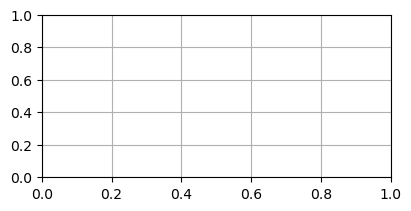

In [2]:
figR, (axR) = plt.subplots(1, 1, figsize=(4, 2), constrained_layout=True)
axR.grid(True, which="both", ls="-")

x1 = np.logspace(np.log10(0.01), np.log10(100), 10000)

axR.plot(x1,CSF,color="magenta")

axR.set_xscale('log')
axR.set_yscale('log')
axR.set_ylim(0.001,0.1)
axR.set_xlim(0.009,110)
axR.set_xticks((0.01,0.1,1,10,100),(0.01,0.1,1,10,100))
axR.set_yticks((0.001,0.01,0.1),(0.001,0.01,0.1))

In [15]:
import colour as c
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import fmin


def Invers_CSF_Barten_BT2246(L,X_0=60,Y_0=60,k=3.0,T=0.1,X_max=12,N_max=15,n=0.03,p=1.2274*10**6,phi_0=3*10**-8,u_0=7):

    def max_sfrequency(L,X_0,Y_0,k,T,X_max,N_max,n,p,phi_0,u_0):
        max_sfrequency = []
        for L_v in L:
            d = c.contrast.pupil_diameter_Barten1999(L_v, X_0)
            sigma = c.contrast.sigma_Barten1999(0.5 / 60, 0.08 / 60, d)
            E = c.contrast.retinal_illuminance_Barten1999(L_v, d, True)
            max_sfrequency.append(
                fmin(
                    lambda x: (
                        -c.contrast.contrast_sensitivity_function_Barten1999(
                            u=x, sigma=sigma,
                            X_0=X_0, Y_0=Y_0,
                            E=E, k=k, T=T,
                            X_max=X_max, N_max=N_max,
                            n=n, p=p, phi_0=phi_0,u_0=u_0
                        )
                    ),
                    0,
                    disp=False,
                )[0]
            )
        return np.array(max_sfrequency)
    
    Y_0 = X_0
    d = c.contrast.pupil_diameter_Barten1999(L, X_0, Y_0)
    sigma = c.contrast.sigma_Barten1999(0.5 / 60, 0.08 / 60, d)
    E = c.contrast.retinal_illuminance_Barten1999(L, d)

    u = max_sfrequency(L,X_0=60,Y_0=60,k=3.0,T=0.1,X_max=12,N_max=15,n=0.03,p=1.2274*10**6,phi_0=3*10**-8,u_0=7)

    return np.multiply(
        np.multiply( 
        np.divide(1 , c.contrast.contrast_sensitivity_function_Barten1999(
        u=u, sigma=sigma, 
        E=E, X_0=X_0, Y_0=Y_0,
        k=k, T=T, X_max=X_max, N_max=N_max,
        n=n, p=p, phi_0=phi_0, u_0=u_0)
        )
        , 2 )
        , np.divide(1 , 1.27))

In [7]:
np.linspace(0,1023,1024)/1023

array([  0.00000000e+00,   9.77517107e-04,   1.95503421e-03, ...,
         9.98044966e-01,   9.99022483e-01,   1.00000000e+00])

In [40]:
bt1886_array_10bit

array([ 0.        ,  0.05570384,  0.07435571, ...,  0.99918494,
        0.99959259,  1.        ])

In [42]:
np.max(counter)

0.055703842294514708

NameError: name 'Invers_CSF_Barten_BT2246' is not defined

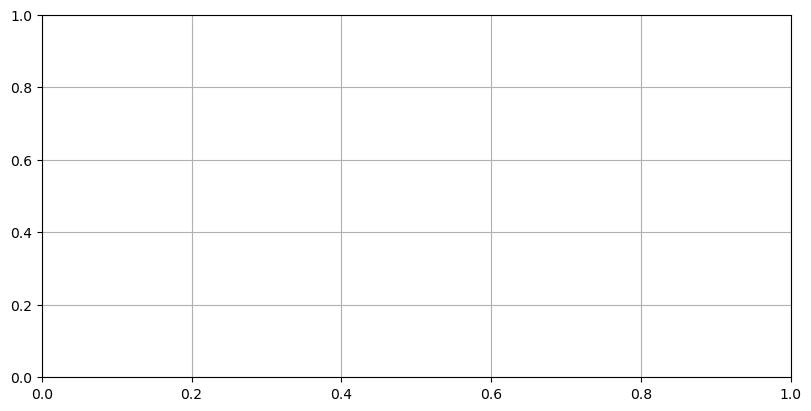

In [5]:
figR, (axR) = plt.subplots(1, 1, figsize=(8, 4), constrained_layout=True)
axR.grid(True, which="both", ls="-")

x1 = np.logspace(np.log10(0.01), np.log10(10000), 1023)
x2 = np.logspace(np.log10(0.01), np.log10(100), 1023)
x3 = np.logspace(np.log10(0.01), np.log10(10000), 1023)

axR.plot(x1,Invers_CSF_Barten_BT2246(np.logspace(np.log10(0.01), np.log10(100), 1023),X_0=60),color="magenta")

test_array_10bit = np.linspace(0.01,1,1024)
test_array_12bit = np.linspace(0,1023,4095)/4096
bt1886_array_10bit = c.models.eotf_BT1886(test_array_10bit)
st2084_array_10bit = c.models.eotf_ST2084(test_array_10bit)

counter = np.zeros((1023))
counter2 = np.zeros((1023))

for i in range(0,1023):
    counter[i] = (np.abs(bt1886_array_10bit[i] - bt1886_array_10bit[i+1]))/bt1886_array_10bit[i]

for i in range(0,1023):
    counter2[i] = (np.abs(st2084_array_10bit[i] - st2084_array_10bit[i+1]))/st2084_array_10bit[i]

axR.plot(x1,counter)

axR.plot(x3,counter2)

# axR.plot(x1,[ 0.0207396,  0.0133019,  0.0089256,  0.0064202,  0.0050275,  0.0041933,  0.0035573,  0.0030095,  0.0025803,  0.0022897 ] , color="black", alpha = 0.5 )

axR.set_xscale('log')
axR.set_yscale('log')
axR.set_ylim(0.001,1)
axR.set_xlim(0.009,10010)
axR.set_xticks((0.01,0.1,1,10,100,1000,10000),(0.01,0.1,1,10,100,1000,10000))
axR.set_yticks((0.001,0.01,0.1,1),(0.001,0.01,0.1,1))

In [16]:
import colour as c
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import fmin


def Invers_CSF_Barten_Digital_Cinema(L,X_0=60,Y_0=60,k=3.0,T=0.1,X_max=12,N_max=15,n=0.03,p=1.2274*10**6,phi_0=3*10**-8,u_0=7):

    def max_sfrequency(L,X_0,Y_0,k,T,X_max,N_max,n,p,phi_0,u_0):
        max_sfrequency = []
        for L_v in L:
            d = c.contrast.pupil_diameter_Barten1999(L_v, X_0)
            sigma = c.contrast.sigma_Barten1999(0.5 / 60, 0.08 / 60, d)
            E = c.contrast.retinal_illuminance_Barten1999(L_v, d, True)
            max_sfrequency.append(
                fmin(
                    lambda x: (
                        -c.contrast.contrast_sensitivity_function_Barten1999(
                            u=x, sigma=sigma,
                            X_0=X_0, Y_0=Y_0,
                            E=E, k=k, T=T,
                            X_max=X_max, N_max=N_max,
                            n=n, p=p, phi_0=phi_0,u_0=u_0
                        )
                    ),
                    0,
                    disp=False,
                )[0]
            )
        return np.array(max_sfrequency)
    
    Y_0 = X_0
    d = c.contrast.pupil_diameter_Barten1999(L, X_0, Y_0)
    sigma = c.contrast.sigma_Barten1999(0.5 / 60, 0.08 / 60, d)
    E = c.contrast.retinal_illuminance_Barten1999(L, d)

    u = max_sfrequency(L,X_0=60,Y_0=60,k=3.0,T=0.1,X_max=12,N_max=15,n=0.03,p=1.2274*10**6,phi_0=3*10**-8,u_0=7)

    return np.divide(1 , c.contrast.contrast_sensitivity_function_Barten1999(
        u=u, sigma=sigma, 
        E=E, X_0=X_0, Y_0=Y_0,
        k=k, T=T, X_max=X_max, N_max=N_max,
        n=n, p=p, phi_0=phi_0, u_0=u_0)
        )

In [17]:
import sys
#sys.path.append('../shared/')
#import videodisko as vd
# Imports
import numpy as np
import numpy.matlib
import numpy.random
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import axes3d 

from matplotlib import pyplot as plt

from scipy import ndimage
from scipy import misc
from scipy import fftpack
from scipy import optimize
import scipy.io
import skimage
import imageio
import colour as c
import math
import csv

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import pandas as pd

import cv2
import time

from datetime import datetime

import os
from fnmatch import fnmatch




## Linear to sRGB
def lin2srgb (x):
    result = (x <= 0.0031308) * np.multiply(x,12.92) + (x > 0.0031308) * np.subtract(np.multiply(1.055,np.power(x,(1/2.4))),0.055)
    return result


## sRGB to Linear 
def srgb2lin (x):
    result = (x <= 0.04045) * np.divide(x,12.92) + (x > 0.04045) * np.power(np.divide(np.add(x,0.055),1.055),2.4)
    return result

# SDR Formulas

## Input Luminance between 0-1
## Output Videosignal
def oetf709(x): 
    return np.subtract(np.multiply(np.power(x, 0.45), 1.099), 0.099)*(0.018<= x) + np.multiply(4.5, x) * (x <0.018)

def eotf1886(x, Lw = 100, Lb = 0): 
    gamma = 2.4
    a = np.power(np.subtract(np.power(Lw, np.divide(1,gamma)),np.power(Lb, np.divide(1, gamma))), gamma)
    b = np.divide(np.power(Lb, np.divide(1,gamma)) , np.subtract(np.power(Lw , np.divide(1,gamma)), np.power( Lb , np.divide(1, gamma))))
    return np.multiply(a , np.power( np.maximum(np.add(x, b), 0) , gamma))

def eotf1886_CRT(x, Lw = 100, Lb = 0, b = 0): 
    Vc = 0.35
    a1 = 2.6
    a2 = 3.0
    k = np.subtract(Lw,np.power(np.add(1,b),a1))
    return (x < Vc) * np.multiply(np.multiply(k,np.power(np.add(Vc,b),np.subtract(a1,a2))),np.power(np.add(x,b),a2)) + (Vc <= x) * np.multiply(k,np.power(np.add(x,b),a1))

## Luma Formulas for Rec2020 / Rec709 -> Fixed Addition
def luma709(img): 
    return np.multiply(img[:,:,0],0.2126) + np.multiply(img[:,:,1],0.7152) + np.multiply(img[:,:,2],0.0722)
def luma2020(img): 
    return np.multiply(img[:,:,0],0.2627) + np.multiply(img[:,:,1],0.6780) + np.multiply(img[:,:,2],0.0593)

## Formulas for PQ

# increasing rec.709 formulas 
def steroids709(x): 
    return np.subtract(np.multiply(np.power(np.multiply(59.5208 , x), 0.45), 1.099), 0.099)*(0.0003024< x) + np.multiply(267.84, x) * (x <= 0.0003024)

def steroids1886(x): 
    return np.multiply(100, np.power(x, 2.4))


## Transportfunctions

def pq_eotf(x): 
    ##m1
    m1 = np.divide(2610, 16384) ## 2^14 = 16384
    m2 = np.multiply(np.divide(2523, 4096), 128) ##2^12 = 4096 , 2^7 = 128 -> Jan fragen
    c1 = np.divide(3424, 4096)
    c2 = np.multiply(np.divide(2413, 4096), 32)
    c3 = np.multiply(np.divide(2392, 4096), 32)

    
    return np.multiply(np.power(np.divide(np.maximum( np.subtract( np.power(x , np.divide(1 , m2)), c1) , 0) , np.subtract(c2, np.multiply(c3 , np.power(x , np.divide(1 , m2))))) , np.divide(1, m1)), 10000)

## Inverse_eotf

def pq_eotf_inv(x): 
    m1 = np.divide(2610, 16384) ## 2^14 = 16384
    m2 = np.multiply(np.divide(2523, 4096), 128) ##2^12 = 4096 , 2^7 = 128 -> Jan fragen
    c1 = np.divide(3424, 4096)
    c2 = np.multiply(np.divide(2413, 4096), 32)
    c3 = np.multiply(np.divide(2392, 4096), 32)

    y = np.divide(x , 10000) ## Normalisierung auf 0.00 bis 1.0

    return np.power( np.divide(np.add(c1 , np.multiply(c2 , np.power(y , m1))), np.add(1 , np.multiply(c3 , np.power(y , m1)))), m2)

# RGB Input
def hlg_oetf(x): 
    a = 0.17883277
    b = np.subtract(1 , np.multiply(4 , a))
    c = np.subtract(0.5 , np.multiply(a , np.log(np.multiply(4 , a))))

    return np.where(x <= np.divide(1,12), np.sqrt(np.multiply(3,x )), np.add( np.multiply(a , np.log(np.subtract( np.multiply(12 , x ), b))) , c) )

def hlg_oetf_inv(x):
    a = 0.17883277
    b = np.subtract(1 , np.multiply(4 , a))
    c = np.subtract(0.5 , np.multiply(a , np.log(np.multiply(4 , a))))
    
    return np.where(x <= 0.5 , np.divide( np.power(x,2), 3), np.divide(np.add(np.exp(np.divide(np.subtract(x , c), a)), b) , 12) )

## Lw = Usergain, nominal peak Luminance of the display (achromatic)
def hlg_ootf(x, Lw): 
    r = x[: , : , 0]
    g = x[: , : , 1]
    b = x[: , : , 2]
    luma = np.add(np.multiply(0.2627 ,r ), np.multiply(0.678 , g), np.multiply(0.0593 , b))
    alpha = Lw
    gamma = np.add(1.2, np.multiply(0.42 , np.log10(np.divide(Lw,1000))))
    rd = np.multiply( alpha , np.power(luma , np.subtract(gamma , 1)), r)
    gd = np.multiply( alpha , np.power(luma , np.subtract(gamma , 1)), g)
    bd = np.multiply( alpha , np.power(luma , np.subtract(gamma , 1)), b)
    return np.stack((rd , gd , bd))

## Lw = Usergain, nominal peak Luminance of the display (achromatic)
def hlg_ootf_bw(x, Lw=1000): 
    alpha = Lw
    gamma = np.add(1.2, np.multiply(0.42 , np.log10(np.divide(Lw,1000))))
    return np.multiply(np.multiply( alpha , np.power(x , np.subtract(gamma , 1))),x)

def hlg_eotf(x, Lw = 1000, Lb = 0.005):
    gamma = np.add(1.2, np.multiply(0.42 , np.log10(np.divide(Lw,1000))))
    beta = np.sqrt(np.multiply(3 , np.power(np.divide(Lb , Lw), np.divide(1,gamma))))
    return hlg_ootf_bw(hlg_oetf_inv(np.maximum(0 , (np.add( np.multiply( np.subtract(1 , beta), x ), beta)))), Lw)


def slog3oetf(x): 
    # reflection add
    x = x*0.9

    return (x < 0.01125)* np.divide( np.add( np.multiply(x , np.divide(np.subtract(171.2102946929, 95), 0.01125)), 95), 1023) + (x >= 0.01125)* np.divide(np.add(420 , np.multiply( np.log10(np.divide(np.add(x,0.01), np.add(0.18, 0.01))), 261.5)), 1023)

def slog3eotf(x): 
    return (x >= np.divide(171.2102946929,1023)) * np.subtract( np.multiply(np.power(10 , np.divide( np.subtract(420 , np.multiply(x , 1023)) , 261.5)) , np.add(0.18 , 0.01)) , 0.01) + (x < np.divide(171.2102946929,1023)) * np.multiply(np.subtract(np.multiply(x , 1023), 95 ) , np.divide(0.01125 , np.subtract(171.2102946929 , 95)))

# These are the ARRI LogCv3 Formulas
def lin2logc(x):
    return np.multiply(x > 0.010591, 0.24719 * np.log10(5.555556 * x + 0.052272) + 0.385537) + np.multiply(x <= 0.010591, 5.367655 * x + 0.092809)
def logc2lin(x):
    return np.multiply(x > 0.149659, (np.power(10.0, (x - 0.385537) / 0.247189) - 0.052272) / 5.555556) + np.multiply(x <= 0.149659, (x - 0.092809) / 5.367650)


### LOG C4
def Encoding_LogC4(x):
    a = (np.power(2.0, 18.0) - 16.0) / 117.45
    b = (1023.0 - 95.0) / 1023.0
    c = 95.0 / 1023.0
    s = (7 * np.log(2) * np.power(2.0, 7 - 14 * c / b)) / (a * b)
    t = (np.power(2.0, 14.0 * (-c / b) + 6.0) - 64.0) / a
    return (x < t) * np.divide(np.subtract(x,t),s) + (x >= t) * np.add(np.multiply(np.divide( np.subtract(np.log2(np.add(np.multiply(a,x),64.0)),6.0),14.0),b),c)

def Decoding_LogC4(x):
    a = (np.power(2.0, 18.0) - 16.0) / 117.45
    b = (1023.0 - 95.0) / 1023.0
    c = 95.0 / 1023.0
    s = (7 * np.log(2) * np.power(2.0, 7 - 14 * c / b)) / (a * b)
    t = (np.power(2.0, 14.0 * (-c / b) + 6.0) - 64.0) / a
    return (x < 0.0) * np.add(np.multiply(x,s),t) + (x >= 0.0) * np.divide(np.subtract(np.power(2.0, np.add(np.multiply(14,np.divide(np.subtract(x,c),b)),6)),64.0),a)


def full2legal(x):
    return (219*(x)+16)*np.power(2,(10-8))

def legal2full(x):
    return (((x/np.power(2,(10-8)))-16)/219)

def lin2log2(x):
    return np.log2(x)

def log22lin(x):
    return np.power(2,x)

def Blenden_Differenz(num1, num2):
    new2 = num2 / num1
    return np.log2(new2)

def mse_calculation(imageA, imageB):
    # Expects Luma Images
	err = np.mean(np.square(np.subtract(imageA,imageB)))
	return err




def BT2020_Linear_to_ICtCp(original):
    ictcp_array = np.zeros((np.shape(original)))

    L1 = (1688*original[:,:,0] + 2146*original[:,:,1] + 262*original[:,:,2])/4096
    M1 = (683*original[:,:,0] + 2951*original[:,:,1] + 462*original[:,:,2])/4096
    S1 = (99*original[:,:,0] + 309*original[:,:,1] + 3688*original[:,:,2])/4096

    L1_Mapped = c.models.eotf_inverse_ST2084(L1)
    M1_Mapped = c.models.eotf_inverse_ST2084(M1)
    S1_Mapped = c.models.eotf_inverse_ST2084(S1)

    ictcp_array[:,:,0] = 0.5*L1_Mapped+0.5*M1_Mapped
    ictcp_array[:,:,1] =(6610*L1_Mapped - 13613*M1_Mapped + 7003*S1_Mapped)/4096
    ictcp_array[:,:,2] =(17933*L1_Mapped - 17390*M1_Mapped - 543*S1_Mapped)/4096

    return ictcp_array






import numpy as np

def flatten_and_reshape_array(original_array, new_shape):
    flattened_array = np.array(original_array).flatten()
    reshaped_array = flattened_array[:np.prod(new_shape)].reshape(new_shape)
    return reshaped_array

# Create a sample 2D array
sample_2d_array = np.random.randint(1, 10, size=(8, 10))

# Specify the new shape (for example, 4x20)
new_shape = (2160, 3840)






import numpy as np

def create_dict_from_arrays(array1, array2):
    # Ensure both arrays have the same size
    assert array1.shape == array2.shape, "Arrays must have the same size"

    # Create a dictionary using a dictionary comprehension
    result_dict = {array1[i, j]: array2[i, j] for i in range(array1.shape[0]) for j in range(array1.shape[1])}

    return result_dict

# # Example arrays (replace with your actual arrays)
# array1 = np.array([[1, 2, 3], [4, 5, 6]])
# array2 = np.array([[10, 20, 30], [40, 50, 60]])





import csv

def read_csv_into_2d_array(file_path):
    with open(file_path, 'r') as csvfile:
        csvreader = csv.reader(csvfile)
        # Use list comprehension to create a 2D array from the CSV rows
        csv_data_2d_array = [row for row in csvreader]

    return csv_data_2d_array





def remove_items_below_threshold(dictionary, threshold):
    # Use a dictionary comprehension to filter key-value pairs based on the threshold
    filtered_dict = {key: value for key, value in dictionary.items() if value >= threshold}

    return filtered_dict




import heapq

def get_top_n_items(dictionary, n):
    # Use heapq.nlargest to get the top n key-value pairs based on values
    top_n_items = heapq.nlargest(n, dictionary.items(), key=lambda item: item[1])

    # Convert the result back to a dictionary
    top_n_dict = dict(top_n_items)

    return top_n_dict

# Example usage:
my_dict = {'key1': 1.2, 'key2': 2.5, 'key3': 3.0, 'key4': 4.2, 'key5': 5.5, 'key6': 6.0}
top_n = 3  # Change this to 20000 for your specific case

top_n_dict = get_top_n_items(my_dict, top_n)

print("Original Dictionary:", my_dict)
print(f"Top {top_n} Dictionary based on values:", top_n_dict)







Original Dictionary: {'key1': 1.2, 'key2': 2.5, 'key3': 3.0, 'key4': 4.2, 'key5': 5.5, 'key6': 6.0}
Top 3 Dictionary based on values: {'key6': 6.0, 'key5': 5.5, 'key4': 4.2}


/var/folders/5g/lmsxmd_122x8g7pj5_379g5w0000gn/T/ipykernel_21806/2729382273.py:58: RuntimeWarning: divide by zero encountered in true_divide
  d = np.divide(b,z)
/var/folders/5g/lmsxmd_122x8g7pj5_379g5w0000gn/T/ipykernel_21806/2729382273.py:66: RuntimeWarning: divide by zero encountered in true_divide
  d = np.divide(b,z)
/Users/justus/.local/lib/python3.9/site-packages/colour/contrast/barten1999.py:491: RuntimeWarning: divide by zero encountered in true_divide
  * (1 / (n * p * E) + phi_0 / (1 - np.exp(-((u / u_0) ** 2))))
/var/folders/5g/lmsxmd_122x8g7pj5_379g5w0000gn/T/ipykernel_21806/2729382273.py:72: RuntimeWarning: invalid value encountered in power
  a = np.divide(np.multiply(np.multiply(6.27739,np.add(np.multiply(np.multiply(1.0842021724855044,np.power(10.0,-19)),np.power(x,0.0126833)),0.000117309)),np.power(np.divide(np.subtract(np.power(x,0.0126833),0.835938),np.subtract(18.8516,np.multiply(18.6875,np.power(x,0.0126833)))),5.277394636015)),np.multiply(np.power(x,0.987317),np.

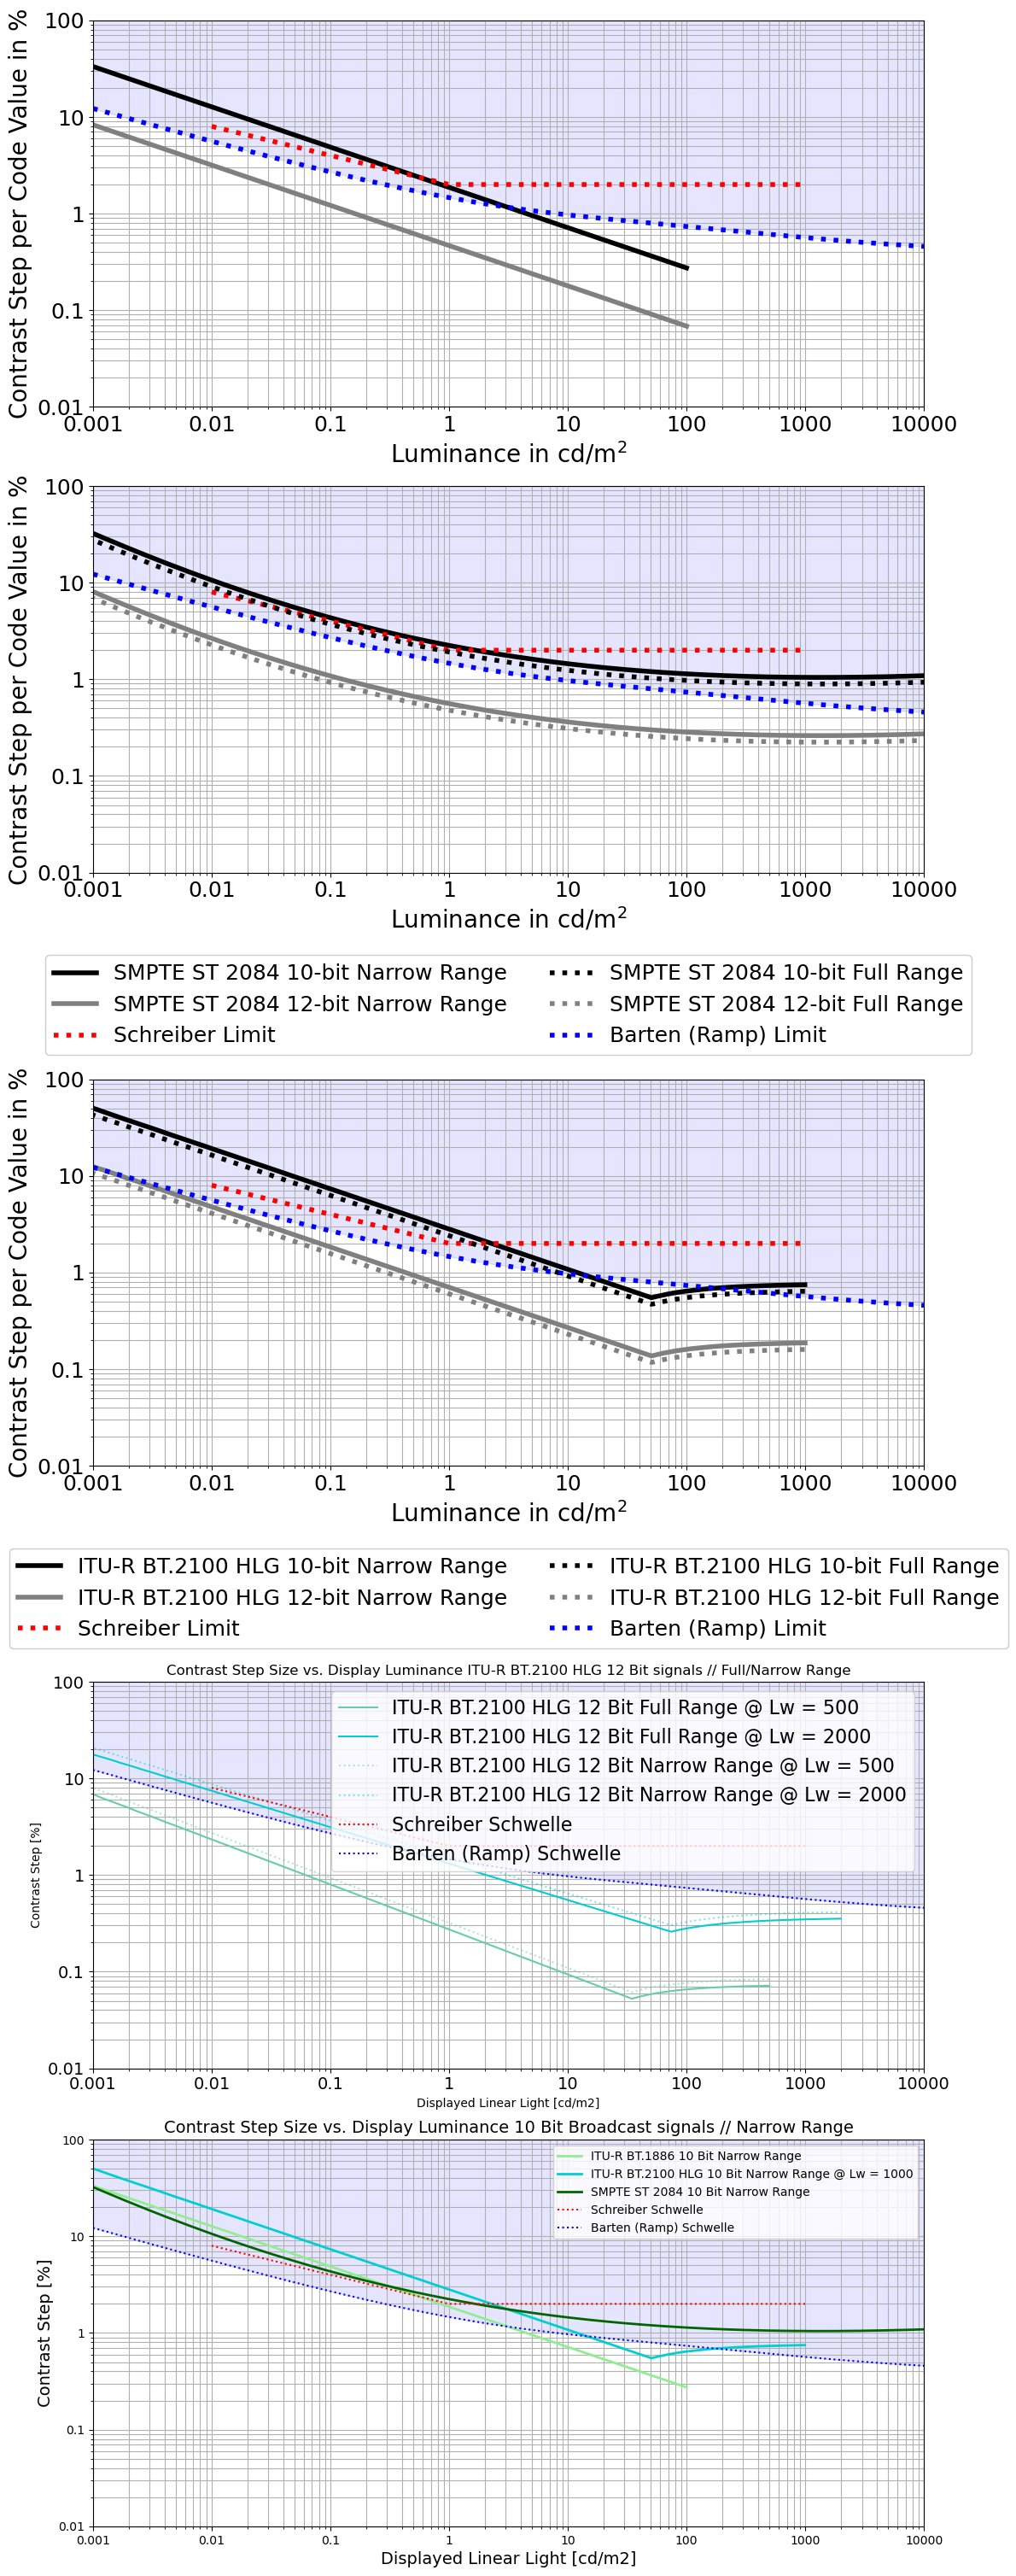

In [26]:
figR, ((axT, axR, axV, axP, axB)) = plt.subplots(5, 1, figsize=(12, 30), constrained_layout=True)
axT.grid(visible=True,which="both")
axR.grid(visible=True,which="both")
axV.grid(visible=True,which="both")
axP.grid(visible=True,which="both")
axB.grid(visible=True,which="both")

x = np.linspace(0,1023,1024)
x1 = np.linspace(0,4095,4096)

x_hlg = np.linspace(0,1022,1023)
x1_hlg = np.linspace(0,4094,4095)

x_1 = np.linspace(0,875,876)
x1_1 = np.linspace(0,3503,3504)
x2 = np.linspace(0,1022,1023)

x11 = np.logspace(np.log10(0.001), np.log10(10000), 1023)

def ableitung_bt1886_10bit(x):
    a = np.gradient(c.models.eotf_BT1886(x/1023), (x/1023))
    b = np.multiply(a,np.divide(1,1023))
    z = (x/1023)**2.4*100
    d = np.divide(b,z)
    e = np.multiply(d,100*100)
    return e

def ableitung_bt1886_12bit(x):
    a = np.gradient(c.models.eotf_BT1886(x/4095), (x/4095))
    b = np.multiply(a,np.divide(1,4095))
    z = (x/4095)**2.4*100
    d = np.divide(b,z)
    e = np.multiply(d,100*100)
    return e

def ableitung_st2084_10bit(x):
    x = x/1023
    a = np.divide(np.multiply(np.multiply(6.27739,np.add(np.multiply(np.multiply(1.0842021724855044,np.power(10.0,-19)),np.power(x,0.0126833)),0.000117309)),np.power(np.divide(np.subtract(np.power(x,0.0126833),0.835938),np.subtract(18.8516,np.multiply(18.6875,np.power(x,0.0126833)))),5.277394636015)),np.multiply(np.power(x,0.987317),np.power(np.subtract(1.00878,np.power(x,0.0126833)),2)))
    b = np.multiply(a,np.divide(1,1023))
    z = c.models.eotf_ST2084(x)
    d = np.divide(b,z)
    e = np.multiply(d,10000*100)
    return e

def ableitung_st2084_12bit(x):
    x = x/4095
    a = np.divide(np.multiply(np.multiply(6.27739,np.add(np.multiply(np.multiply(1.0842021724855044,np.power(10.0,-19)),np.power(x,0.0126833)),0.000117309)),np.power(np.divide(np.subtract(np.power(x,0.0126833),0.835938),np.subtract(18.8516,np.multiply(18.6875,np.power(x,0.0126833)))),5.277394636015)),np.multiply(np.power(x,0.987317),np.power(np.subtract(1.00878,np.power(x,0.0126833)),2)))
    b = np.multiply(a,np.divide(1,4095))
    z = c.models.eotf_ST2084(x)
    d = np.divide(b,z)
    e = np.multiply(d,10000*100)
    return e

def ableitung_bt1886_10bit_narrow(x):
    a = np.gradient(c.models.eotf_BT1886(x/875), (x/875))
    b = np.multiply(a,np.divide(1,875))
    z = (x/875)**2.4*100
    d = np.divide(b,z)
    e = np.multiply(d,100*100)
    return e

def ableitung_bt1886_12bit_narrow(x):
    a = np.gradient(c.models.eotf_BT1886(x/3503), (x/3503))
    b = np.multiply(a,np.divide(1,3503))
    z = (x/3503)**2.4*100
    d = np.divide(b,z)
    e = np.multiply(d,100*100)
    return e

def ableitung_st2084_10bit_narrow(x):
    x = x/875
    a = np.divide(np.multiply(np.multiply(6.27739,np.add(np.multiply(np.multiply(1.0842021724855044,np.power(10.0,-19)),np.power(x,0.0126833)),0.000117309)),np.power(np.divide(np.subtract(np.power(x,0.0126833),0.835938),np.subtract(18.8516,np.multiply(18.6875,np.power(x,0.0126833)))),5.277394636015)),np.multiply(np.power(x,0.987317),np.power(np.subtract(1.00878,np.power(x,0.0126833)),2)))
    b = np.multiply(a,np.divide(1,875))
    z = c.models.eotf_ST2084(x)
    d = np.divide(b,z)
    e = np.multiply(d,10000*100)
    return e

def ableitung_st2084_12bit_narrow(x):
    x = x/3503
    a = np.divide(np.multiply(np.multiply(6.27739,np.add(np.multiply(np.multiply(1.0842021724855044,np.power(10.0,-19)),np.power(x,0.0126833)),0.000117309)),np.power(np.divide(np.subtract(np.power(x,0.0126833),0.835938),np.subtract(18.8516,np.multiply(18.6875,np.power(x,0.0126833)))),5.277394636015)),np.multiply(np.power(x,0.987317),np.power(np.subtract(1.00878,np.power(x,0.0126833)),2)))
    b = np.multiply(a,np.divide(1,3503))
    z = c.models.eotf_ST2084(x)
    d = np.divide(b,z)
    e = np.multiply(d,10000*100)
    return e


def ableitung_bt2100hlg_10bit_1000(x):

    def f(variab):
        return c.models.eotf_HLG_BT2100(variab,0,1000)
    lin = np.linspace(0, 1, 32123)
    lin_eotf = c.models.eotf_HLG_BT2100(lin,0,1000)
    dfdx = np.gradient(f(lin), lin)
    
    x = x/1023
    a = np.linspace(0,1,1024)

    test_dict = {}
    for A, B in zip(lin_eotf, dfdx):
        test_dict[A] = B

    for i in range(0,1024):
        search_key = c.models.eotf_HLG_BT2100(i/1023,0,1000)
        a[i]= test_dict.get(search_key) or test_dict[min(test_dict.keys(), key = lambda key: abs(key-search_key))]/1000
    
    b = np.multiply(a,np.divide(1,1023))
    z = c.models.eotf_HLG_BT2100(x,0,1000)
    d = np.divide(b,z)
    e = np.multiply(d,1000*100)
    return e


def ableitung_bt2100hlg_10bit_500(x):

    def f(variab):
        return c.models.eotf_HLG_BT2100(variab,0,500)
    lin = np.linspace(0, 1, 32123)
    lin_eotf = c.models.eotf_HLG_BT2100(lin,0,500)
    dfdx = np.gradient(f(lin), lin)
    
    x = x/1023
    a = np.linspace(0,1,1024)

    test_dict = {}
    for A, B in zip(lin_eotf, dfdx):
        test_dict[A] = B

    for i in range(0,1024):
        search_key = c.models.eotf_HLG_BT2100(i/1023,0,500)
        a[i]= test_dict.get(search_key) or test_dict[min(test_dict.keys(), key = lambda key: abs(key-search_key))]/1000
    
    b = np.multiply(a,np.divide(1,1023))
    z = c.models.eotf_HLG_BT2100(x,0,500)
    d = np.divide(b,z)
    e = np.multiply(d,500*100)
    return e

def ableitung_bt2100hlg_10bit_2000(x):

    def f(variab):
        return c.models.eotf_HLG_BT2100(variab,0,2000)
    lin = np.linspace(0, 1, 32123)
    lin_eotf = c.models.eotf_HLG_BT2100(lin,0,2000)
    dfdx = np.gradient(f(lin), lin)
    
    x = x/1023
    a = np.linspace(0,1,1024)

    test_dict = {}
    for A, B in zip(lin_eotf, dfdx):
        test_dict[A] = B

    for i in range(0,1024):
        search_key = c.models.eotf_HLG_BT2100(i/1023,0,2000)
        a[i]= test_dict.get(search_key) or test_dict[min(test_dict.keys(), key = lambda key: abs(key-search_key))]/1000
    
    b = np.multiply(a,np.divide(1,1023))
    z = c.models.eotf_HLG_BT2100(x,0,2000)
    d = np.divide(b,z)
    e = np.multiply(d,2000*100)
    return e

def ableitung_bt2100hlg_12bit_1000(x):

    def f(variab):
        return c.models.eotf_HLG_BT2100(variab,0,1000)
    lin = np.linspace(0, 1, 32123)
    lin_eotf = c.models.eotf_HLG_BT2100(lin,0,1000)
    dfdx = np.gradient(f(lin), lin)
    
    x = x/4095
    a = np.linspace(0,1,4096)

    test_dict = {}
    for A, B in zip(lin_eotf, dfdx):
        test_dict[A] = B

    for i in range(0,4096):
        search_key = c.models.eotf_HLG_BT2100(i/4095,0,1000)
        a[i]= test_dict.get(search_key) or test_dict[min(test_dict.keys(), key = lambda key: abs(key-search_key))]/1000
    
    b = np.multiply(a,np.divide(1,4095))
    z = c.models.eotf_HLG_BT2100(x,0,1000)
    d = np.divide(b,z)
    e = np.multiply(d,1000*100)
    return e

def ableitung_bt2100hlg_12bit_500(x):

    def f(variab):
        return c.models.eotf_HLG_BT2100(variab,0,500)
    lin = np.linspace(0, 1, 32123)
    lin_eotf = c.models.eotf_HLG_BT2100(lin,0,500)
    dfdx = np.gradient(f(lin), lin)
    
    x = x/4095
    a = np.linspace(0,1,4096)

    test_dict = {}
    for A, B in zip(lin_eotf, dfdx):
        test_dict[A] = B

    for i in range(0,4096):
        search_key = c.models.eotf_HLG_BT2100(i/4095,0,500)
        a[i]= test_dict.get(search_key) or test_dict[min(test_dict.keys(), key = lambda key: abs(key-search_key))]/1000
    
    b = np.multiply(a,np.divide(1,4095))
    z = c.models.eotf_HLG_BT2100(x,0,500)
    d = np.divide(b,z)
    e = np.multiply(d,500*100)
    return e

def ableitung_bt2100hlg_12bit_2000(x):

    def f(variab):
        return c.models.eotf_HLG_BT2100(variab,0,2000)
    lin = np.linspace(0, 1, 32123)
    lin_eotf = c.models.eotf_HLG_BT2100(lin,0,2000)
    dfdx = np.gradient(f(lin), lin)
    
    x = x/4095
    a = np.linspace(0,1,4096)

    test_dict = {}
    for A, B in zip(lin_eotf, dfdx):
        test_dict[A] = B

    for i in range(0,4096):
        search_key = c.models.eotf_HLG_BT2100(i/4095,0,2000)
        a[i]= test_dict.get(search_key) or test_dict[min(test_dict.keys(), key = lambda key: abs(key-search_key))]/1000
    
    b = np.multiply(a,np.divide(1,4095))
    z = c.models.eotf_HLG_BT2100(x,0,2000)
    d = np.divide(b,z)
    e = np.multiply(d,2000*100)
    return e







def ableitung_bt2100hlg_10bit_1000_NR(x):

    def f(variab):
        return c.models.eotf_HLG_BT2100(variab,0,1000)
    lin = np.linspace(0, 1, 32123)
    lin_eotf = c.models.eotf_HLG_BT2100(lin,0,1000)
    dfdx = np.gradient(f(lin), lin)
    
    x = x/875
    a = np.linspace(0,1,876)

    test_dict = {}
    for A, B in zip(lin_eotf, dfdx):
        test_dict[A] = B

    for i in range(0,876):
        search_key = c.models.eotf_HLG_BT2100(i/875,0,1000)
        a[i]= test_dict.get(search_key) or test_dict[min(test_dict.keys(), key = lambda key: abs(key-search_key))]/1000
    
    b = np.multiply(a,np.divide(1,875))
    z = c.models.eotf_HLG_BT2100(x,0,1000)
    d = np.divide(b,z)
    e = np.multiply(d,1000*100)
    return e

def ableitung_bt2100hlg_10bit_500_NR(x):

    def f(variab):
        return c.models.eotf_HLG_BT2100(variab,0,500)
    lin = np.linspace(0, 1, 55555)
    lin_eotf = c.models.eotf_HLG_BT2100(lin,0,500)
    dfdx = np.gradient(f(lin), lin)
    
    x = x/875
    a = np.linspace(0,1,876)

    test_dict = {}
    for A, B in zip(lin_eotf, dfdx):
        test_dict[A] = B

    for i in range(0,876):
        search_key = c.models.eotf_HLG_BT2100(i/875,0,500)
        a[i]= test_dict.get(search_key) or test_dict[min(test_dict.keys(), key = lambda key: abs(key-search_key))]/1000
    
    b = np.multiply(a,np.divide(1,875))
    z = c.models.eotf_HLG_BT2100(x,0,500)
    d = np.divide(b,z)
    e = np.multiply(d,500*100)
    return e

def ableitung_bt2100hlg_10bit_2000_NR(x):

    def f(variab):
        return c.models.eotf_HLG_BT2100(variab,0,2000)
    lin = np.linspace(0, 1, 32123)
    lin_eotf = c.models.eotf_HLG_BT2100(lin,0,2000)
    dfdx = np.gradient(f(lin), lin)
    
    x = x/875
    a = np.linspace(0,1,876)

    test_dict = {}
    for A, B in zip(lin_eotf, dfdx):
        test_dict[A] = B

    for i in range(0,876):
        search_key = c.models.eotf_HLG_BT2100(i/875,0,2000)
        a[i]= test_dict.get(search_key) or test_dict[min(test_dict.keys(), key = lambda key: abs(key-search_key))]/1000
    
    b = np.multiply(a,np.divide(1,875))
    z = c.models.eotf_HLG_BT2100(x,0,2000)
    d = np.divide(b,z)
    e = np.multiply(d,2000*100)
    return e

def ableitung_bt2100hlg_12bit_1000_NR(x):

    def f(variab):
        return c.models.eotf_HLG_BT2100(variab,0,1000)
    lin = np.linspace(0, 1, 32123)
    lin_eotf = c.models.eotf_HLG_BT2100(lin,0,1000)
    dfdx = np.gradient(f(lin), lin)
    
    x = x/3503
    a = np.linspace(0,1,3504)

    test_dict = {}
    for A, B in zip(lin_eotf, dfdx):
        test_dict[A] = B

    for i in range(0,3504):
        search_key = c.models.eotf_HLG_BT2100(i/3503,0,1000)
        a[i]= test_dict.get(search_key) or test_dict[min(test_dict.keys(), key = lambda key: abs(key-search_key))]/1000
    
    b = np.multiply(a,np.divide(1,3503))
    z = c.models.eotf_HLG_BT2100(x,0,1000)
    d = np.divide(b,z)
    e = np.multiply(d,1000*100)
    return e

def ableitung_bt2100hlg_12bit_500_NR(x):

    def f(variab):
        return c.models.eotf_HLG_BT2100(variab,0,500)
    lin = np.linspace(0, 1, 32123)
    lin_eotf = c.models.eotf_HLG_BT2100(lin,0,500)
    dfdx = np.gradient(f(lin), lin)
    
    x = x/3503
    a = np.linspace(0,1,3504)

    test_dict = {}
    for A, B in zip(lin_eotf, dfdx):
        test_dict[A] = B

    for i in range(0,3504):
        search_key = c.models.eotf_HLG_BT2100(i/3503,0,500)
        a[i]= test_dict.get(search_key) or test_dict[min(test_dict.keys(), key = lambda key: abs(key-search_key))]/1000
    
    b = np.multiply(a,np.divide(1,3503))
    z = c.models.eotf_HLG_BT2100(x,0,500)
    d = np.divide(b,z)
    e = np.multiply(d,500*100)
    return e

def ableitung_bt2100hlg_12bit_2000_NR(x):

    def f(variab):
        return c.models.eotf_HLG_BT2100(variab,0,2000)
    lin = np.linspace(0, 1, 32123)
    lin_eotf = c.models.eotf_HLG_BT2100(lin,0,2000)
    dfdx = np.gradient(f(lin), lin)
    
    x = x/3503
    a = np.linspace(0,1,3504)

    test_dict = {}
    for A, B in zip(lin_eotf, dfdx):
        test_dict[A] = B

    for i in range(0,3504):
        search_key = c.models.eotf_HLG_BT2100(i/3503,0,2000)
        a[i]= test_dict.get(search_key) or test_dict[min(test_dict.keys(), key = lambda key: abs(key-search_key))]/1000
    
    b = np.multiply(a,np.divide(1,3503))
    z = c.models.eotf_HLG_BT2100(x,0,2000)
    d = np.divide(b,z)
    e = np.multiply(d,2000*100)
    return e






axT.plot(c.models.eotf_BT1886(x_1/875)*100, ableitung_bt1886_10bit_narrow(x_1), color='black',linestyle="-",alpha=1,label="ITU-R BT.1886 10-bit Narrow Range",linewidth = 4)



axT.plot([0.01,1,1000],[8,2,2],color="red",linestyle=":",alpha=1,label="Schreiber Limit",linewidth = 4)
axT.plot(c.models.eotf_BT1886(x1_1/3503)*100, ableitung_bt1886_12bit_narrow(x1_1), color='gray',linestyle="-",alpha=1,label="ITU-R BT.1886 12-bit Narrow Range",linewidth = 4)
#axT.plot(x11,Invers_CSF_Barten_BT2246(np.logspace(np.log10(0.001), np.log10(100), 1023),X_0=60)*100,color="blue",label="Barten Schwelle")
axT.plot(x11,Invers_CSF_Barten_BT2246(np.logspace(np.log10(0.001), np.log10(100), 1023),X_0=60)*200,color="blue",linestyle=":",alpha=1,label="Barten (Ramp) Limit",linewidth = 4)
axT.fill_between(x11, Invers_CSF_Barten_BT2246(np.logspace(np.log10(0.001), np.log10(100), 1023),X_0=60)*200, 100, color='blue', alpha=0.1)

#axT.set_title('Contrast Step Size and Display Luminance ITU-R BT.1886 signals // Full/Narrow Range')
axT.set_xlabel(r"Luminance in $\mathregular{cd/m^2}$",fontsize=20)
axT.set_ylabel('Contrast Step per Code Value in %',fontsize=20)
axT.set_xlim(0.001,10000) 
axT.set_ylim(00.1,100) 
axT.set_xscale('log', base=10)
axT.set_yscale('log', base=10)

axT.set_xticks([0.001,0.01,0.1,1,10,100,1000,10000],[0.001,0.01,0.1,1,10,100,1000,10000],fontsize=18)
axT.set_yticks([0.01,0.1,1,10,100],[0.01,0.1,1,10,100],fontsize=18)
#axT.legend(facecolor='white', framealpha=1,loc='lower center',fontsize=18, bbox_to_anchor=(0.5,-0.25), ncol=2)

axR.plot(c.models.eotf_ST2084(x_1/875), ableitung_st2084_10bit_narrow(x_1), color='black',linestyle="-",label="SMPTE ST 2084 10-bit Narrow Range",linewidth = 4)
axR.plot(c.models.eotf_ST2084(x1_1/3503), ableitung_st2084_12bit_narrow(x1_1), color='gray',linestyle="-",label="SMPTE ST 2084 12-bit Narrow Range",linewidth = 4)
axR.plot([0.01,1,1000],[8,2,2],color="red",linestyle=":",alpha=1,label="Schreiber Limit",linewidth = 4)
axR.plot(c.models.eotf_ST2084(x/1023), ableitung_st2084_10bit(x), color='black',linestyle=":",label="SMPTE ST 2084 10-bit Full Range",linewidth = 4)
axR.plot(c.models.eotf_ST2084(x1/4095), ableitung_st2084_12bit(x1), color='gray',linestyle=":",label="SMPTE ST 2084 12-bit Full Range",linewidth = 4)


#axT.plot(x11,Invers_CSF_Barten_BT2246(np.logspace(np.log10(0.001), np.log10(100), 1023),X_0=60)*100,color="blue",label="Barten Schwelle")
axR.plot(x11,Invers_CSF_Barten_BT2246(np.logspace(np.log10(0.001), np.log10(100), 1023),X_0=60)*200,color="blue",linestyle=":",alpha=1,label="Barten (Ramp) Limit",linewidth = 4)
axR.fill_between(x11, Invers_CSF_Barten_BT2246(np.logspace(np.log10(0.001), np.log10(100), 1023),X_0=60)*200, 100, color='blue', alpha=0.1)


#axR.set_title('Contrast Step Size vs. Display Luminance SMPTE ST 2084 signals // Full/Narrow Range')
axR.set_xlabel(r"Luminance in $\mathregular{cd/m^2}$",fontsize=20)
axR.set_ylabel('Contrast Step per Code Value in %',fontsize=20)
axR.set_xlim(0.001,10000) 
axR.set_ylim(00.1,100) 
axR.set_xscale('log', base=10)
axR.set_yscale('log', base=10)

axR.set_xticks([0.001,0.01,0.1,1,10,100,1000,10000],[0.001,0.01,0.1,1,10,100,1000,10000],fontsize=18)
axR.set_yticks([0.01,0.1,1,10,100],[0.01,0.1,1,10,100],fontsize=18)
axR.legend(facecolor='white', framealpha=1,loc='lower center',fontsize=18, bbox_to_anchor=(0.5,-0.5), ncol=2)



axV.plot(c.models.eotf_HLG_BT2100(x_1/875,0,1000)[0:875], ableitung_bt2100hlg_10bit_1000_NR(x_1)[0:875], color='black',linestyle="-",label="ITU-R BT.2100 HLG 10-bit Narrow Range",linewidth = 4)
axV.plot(c.models.eotf_HLG_BT2100(x1_1/3503,0,1000)[0:3503], ableitung_bt2100hlg_12bit_1000_NR(x1_1)[0:3503], color='gray',linestyle="-",label="ITU-R BT.2100 HLG 12-bit Narrow Range",linewidth = 4)
axV.plot([0.01,1,1000],[8,2,2],color="red",linestyle=":",alpha=1,label="Schreiber Limit",linewidth = 4)
axV.plot(c.models.eotf_HLG_BT2100(x/1023,0,1000)[0:1023], ableitung_bt2100hlg_10bit_1000(x)[0:1023], color='black',linestyle=":",label="ITU-R BT.2100 HLG 10-bit Full Range",linewidth = 4)

axV.plot(c.models.eotf_HLG_BT2100(x1/4095,0,1000)[0:4095], ableitung_bt2100hlg_12bit_1000(x1)[0:4095], color='gray',linestyle=":",label="ITU-R BT.2100 HLG 12-bit Full Range",linewidth = 4)



#axT.plot(x11,Invers_CSF_Barten_BT2246(np.logspace(np.log10(0.001), np.log10(100), 1023),X_0=60)*100,color="blue",label="Barten Schwelle")
axV.plot(x11,Invers_CSF_Barten_BT2246(np.logspace(np.log10(0.001), np.log10(100), 1023),X_0=60)*200,color="blue",linestyle=":",alpha=1,label="Barten (Ramp) Limit",linewidth = 4)
axV.fill_between(x11, Invers_CSF_Barten_BT2246(np.logspace(np.log10(0.001), np.log10(100), 1023),X_0=60)*200, 100, color='blue', alpha=0.1)


#axV.set_title('Contrast Step Size vs. Display Luminance ITU-R BT.2100 HLG 10 Bit signals // Full/Narrow Range')
axV.set_xlabel(r"Luminance in $\mathregular{cd/m^2}$",fontsize=20)
axV.set_ylabel('Contrast Step per Code Value in %',fontsize=20)
axV.set_xlim(0.001,10000) 
axV.set_ylim(00.1,100) 
axV.set_xscale('log', base=10)
axV.set_yscale('log', base=10)

axV.set_xticks([0.001,0.01,0.1,1,10,100,1000,10000],[0.001,0.01,0.1,1,10,100,1000,10000],fontsize=18)
axV.set_yticks([0.01,0.1,1,10,100],[0.01,0.1,1,10,100],fontsize=18)
axV.legend(facecolor='white', framealpha=1,loc='lower center',fontsize=18, bbox_to_anchor=(0.5,-0.5), ncol=2)




axP.plot(c.models.eotf_HLG_BT2100(x1/4095,0,500)[0:4095], ableitung_bt2100hlg_12bit_500(x1)[0:4095], color='mediumaquamarine',linestyle="-",label="ITU-R BT.2100 HLG 12 Bit Full Range @ Lw = 500")
axP.plot(c.models.eotf_HLG_BT2100(x1/4095,0,2000)[0:4095], ableitung_bt2100hlg_12bit_2000(x1)[0:4095], color='darkturquoise',linestyle="-",label="ITU-R BT.2100 HLG 12 Bit Full Range @ Lw = 2000")
axP.plot(c.models.eotf_HLG_BT2100(x1_1/3503,0,500)[0:3503], ableitung_bt2100hlg_12bit_500_NR(x1_1)[0:3503], color='mediumaquamarine',linestyle=":",alpha=0.5,label="ITU-R BT.2100 HLG 12 Bit Narrow Range @ Lw = 500")
axP.plot(c.models.eotf_HLG_BT2100(x1_1/3503,0,2000)[0:3503], ableitung_bt2100hlg_12bit_2000_NR(x1_1)[0:3503], color='darkturquoise',linestyle=":",alpha=0.5,label="ITU-R BT.2100 HLG 12 Bit Narrow Range @ Lw = 2000")

axP.plot([0.01,1,1000],[8,2,2],color="red",linestyle=":",alpha=1,label="Schreiber Schwelle")
#axT.plot(x11,Invers_CSF_Barten_BT2246(np.logspace(np.log10(0.001), np.log10(100), 1023),X_0=60)*100,color="blue",label="Barten Schwelle")
axP.plot(x11,Invers_CSF_Barten_BT2246(np.logspace(np.log10(0.001), np.log10(100), 1023),X_0=60)*200,color="blue",linestyle=":",alpha=1,label="Barten (Ramp) Schwelle")
axP.fill_between(x11, Invers_CSF_Barten_BT2246(np.logspace(np.log10(0.001), np.log10(100), 1023),X_0=60)*200, 100, color='blue', alpha=0.1)


axP.set_title('Contrast Step Size vs. Display Luminance ITU-R BT.2100 HLG 12 Bit signals // Full/Narrow Range')
axP.set_xlabel('Displayed Linear Light [cd/m2]')
axP.set_ylabel('Contrast Step [%]')
axP.set_xlim(0.001,10000) 
axP.set_ylim(00.1,100) 
axP.set_xscale('log', base=10)
axP.set_yscale('log', base=10)

axP.set_xticks([0.001,0.01,0.1,1,10,100,1000,10000],[0.001,0.01,0.1,1,10,100,1000,10000],fontsize=14)
axP.set_yticks([0.01,0.1,1,10,100],[0.01,0.1,1,10,100],fontsize=14)
axP.legend(fontsize=16)



axB.plot(c.models.eotf_BT1886(x_1/875)*100, ableitung_bt1886_10bit_narrow(x_1), color='lightgreen',linestyle="-",alpha=1,linewidth=2,label="ITU-R BT.1886 10 Bit Narrow Range")
axB.plot(c.models.eotf_HLG_BT2100(x_1/875,0,1000)[0:875], ableitung_bt2100hlg_10bit_1000_NR(x_1)[0:875], color='darkturquoise',linestyle="-",linewidth=2,label="ITU-R BT.2100 HLG 10 Bit Narrow Range @ Lw = 1000")
axB.plot(c.models.eotf_ST2084(x_1/875), ableitung_st2084_10bit_narrow(x_1), color='darkgreen',linestyle="-",alpha=1,linewidth=2,label="SMPTE ST 2084 10 Bit Narrow Range")

axB.plot([0.01,1,1000],[8,2,2],color="red",linestyle=":",alpha=1,label="Schreiber Schwelle")
#axT.plot(x11,Invers_CSF_Barten_BT2246(np.logspace(np.log10(0.001), np.log10(100), 1023),X_0=60)*100,color="blue",label="Barten Schwelle")
axB.plot(x11,Invers_CSF_Barten_BT2246(np.logspace(np.log10(0.001), np.log10(100), 1023),X_0=60)*200,color="blue",linestyle=":",alpha=1,label="Barten (Ramp) Schwelle")
axB.fill_between(x11, Invers_CSF_Barten_BT2246(np.logspace(np.log10(0.001), np.log10(100), 1023),X_0=60)*200, 100, color='blue', alpha=0.1)


axB.set_title('Contrast Step Size vs. Display Luminance 10 Bit Broadcast signals // Narrow Range',fontsize=14)
axB.set_xlabel('Displayed Linear Light [cd/m2]',fontsize=14)
axB.set_ylabel('Contrast Step [%]',fontsize=14)
axB.set_xlim(0.001,10000) 
axB.set_ylim(00.1,100) 
axB.set_xscale('log', base=10)
axB.set_yscale('log', base=10)

axB.set_xticks([0.001,0.01,0.1,1,10,100,1000,10000],[0.001,0.01,0.1,1,10,100,1000,10000])
axB.set_yticks([0.01,0.1,1,10,100],[0.01,0.1,1,10,100])
axB.legend()

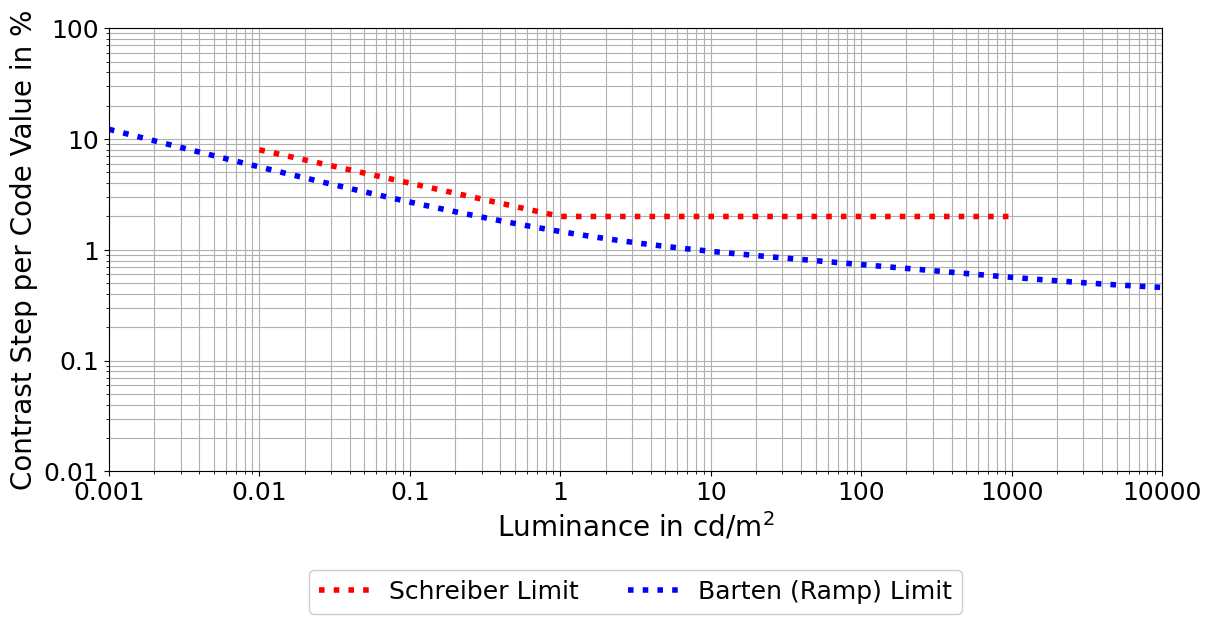

In [20]:
figR, ((axT)) = plt.subplots(1, 1, figsize=(12, (30/5)), constrained_layout=True)
axT.grid(visible=True,which="both")


x = np.linspace(0,1023,1024)
x1 = np.linspace(0,4095,4096)

x_hlg = np.linspace(0,1022,1023)
x1_hlg = np.linspace(0,4094,4095)

x_1 = np.linspace(0,875,876)
x1_1 = np.linspace(0,3503,3504)
x2 = np.linspace(0,1022,1023)

x11 = np.logspace(np.log10(0.001), np.log10(10000), 1023)

def ableitung_bt1886_10bit(x):
    a = np.gradient(c.models.eotf_BT1886(x/1023), (x/1023))
    b = np.multiply(a,np.divide(1,1023))
    z = (x/1023)**2.4*100
    d = np.divide(b,z)
    e = np.multiply(d,100*100)
    return e

def ableitung_bt1886_12bit(x):
    a = np.gradient(c.models.eotf_BT1886(x/4095), (x/4095))
    b = np.multiply(a,np.divide(1,4095))
    z = (x/4095)**2.4*100
    d = np.divide(b,z)
    e = np.multiply(d,100*100)
    return e

def ableitung_st2084_10bit(x):
    x = x/1023
    a = np.divide(np.multiply(np.multiply(6.27739,np.add(np.multiply(np.multiply(1.0842021724855044,np.power(10.0,-19)),np.power(x,0.0126833)),0.000117309)),np.power(np.divide(np.subtract(np.power(x,0.0126833),0.835938),np.subtract(18.8516,np.multiply(18.6875,np.power(x,0.0126833)))),5.277394636015)),np.multiply(np.power(x,0.987317),np.power(np.subtract(1.00878,np.power(x,0.0126833)),2)))
    b = np.multiply(a,np.divide(1,1023))
    z = c.models.eotf_ST2084(x)
    d = np.divide(b,z)
    e = np.multiply(d,10000*100)
    return e

def ableitung_st2084_12bit(x):
    x = x/4095
    a = np.divide(np.multiply(np.multiply(6.27739,np.add(np.multiply(np.multiply(1.0842021724855044,np.power(10.0,-19)),np.power(x,0.0126833)),0.000117309)),np.power(np.divide(np.subtract(np.power(x,0.0126833),0.835938),np.subtract(18.8516,np.multiply(18.6875,np.power(x,0.0126833)))),5.277394636015)),np.multiply(np.power(x,0.987317),np.power(np.subtract(1.00878,np.power(x,0.0126833)),2)))
    b = np.multiply(a,np.divide(1,4095))
    z = c.models.eotf_ST2084(x)
    d = np.divide(b,z)
    e = np.multiply(d,10000*100)
    return e

def ableitung_bt1886_10bit_narrow(x):
    a = np.gradient(c.models.eotf_BT1886(x/875), (x/875))
    b = np.multiply(a,np.divide(1,875))
    z = (x/875)**2.4*100
    d = np.divide(b,z)
    e = np.multiply(d,100*100)
    return e

def ableitung_bt1886_12bit_narrow(x):
    a = np.gradient(c.models.eotf_BT1886(x/3503), (x/3503))
    b = np.multiply(a,np.divide(1,3503))
    z = (x/3503)**2.4*100
    d = np.divide(b,z)
    e = np.multiply(d,100*100)
    return e

def ableitung_st2084_10bit_narrow(x):
    x = x/875
    a = np.divide(np.multiply(np.multiply(6.27739,np.add(np.multiply(np.multiply(1.0842021724855044,np.power(10.0,-19)),np.power(x,0.0126833)),0.000117309)),np.power(np.divide(np.subtract(np.power(x,0.0126833),0.835938),np.subtract(18.8516,np.multiply(18.6875,np.power(x,0.0126833)))),5.277394636015)),np.multiply(np.power(x,0.987317),np.power(np.subtract(1.00878,np.power(x,0.0126833)),2)))
    b = np.multiply(a,np.divide(1,875))
    z = c.models.eotf_ST2084(x)
    d = np.divide(b,z)
    e = np.multiply(d,10000*100)
    return e

def ableitung_st2084_12bit_narrow(x):
    x = x/3503
    a = np.divide(np.multiply(np.multiply(6.27739,np.add(np.multiply(np.multiply(1.0842021724855044,np.power(10.0,-19)),np.power(x,0.0126833)),0.000117309)),np.power(np.divide(np.subtract(np.power(x,0.0126833),0.835938),np.subtract(18.8516,np.multiply(18.6875,np.power(x,0.0126833)))),5.277394636015)),np.multiply(np.power(x,0.987317),np.power(np.subtract(1.00878,np.power(x,0.0126833)),2)))
    b = np.multiply(a,np.divide(1,3503))
    z = c.models.eotf_ST2084(x)
    d = np.divide(b,z)
    e = np.multiply(d,10000*100)
    return e


def ableitung_bt2100hlg_10bit_1000(x):

    def f(variab):
        return c.models.eotf_HLG_BT2100(variab,0,1000)
    lin = np.linspace(0, 1, 32123)
    lin_eotf = c.models.eotf_HLG_BT2100(lin,0,1000)
    dfdx = np.gradient(f(lin), lin)
    
    x = x/1023
    a = np.linspace(0,1,1024)

    test_dict = {}
    for A, B in zip(lin_eotf, dfdx):
        test_dict[A] = B

    for i in range(0,1024):
        search_key = c.models.eotf_HLG_BT2100(i/1023,0,1000)
        a[i]= test_dict.get(search_key) or test_dict[min(test_dict.keys(), key = lambda key: abs(key-search_key))]/1000
    
    b = np.multiply(a,np.divide(1,1023))
    z = c.models.eotf_HLG_BT2100(x,0,1000)
    d = np.divide(b,z)
    e = np.multiply(d,1000*100)
    return e


def ableitung_bt2100hlg_10bit_500(x):

    def f(variab):
        return c.models.eotf_HLG_BT2100(variab,0,500)
    lin = np.linspace(0, 1, 32123)
    lin_eotf = c.models.eotf_HLG_BT2100(lin,0,500)
    dfdx = np.gradient(f(lin), lin)
    
    x = x/1023
    a = np.linspace(0,1,1024)

    test_dict = {}
    for A, B in zip(lin_eotf, dfdx):
        test_dict[A] = B

    for i in range(0,1024):
        search_key = c.models.eotf_HLG_BT2100(i/1023,0,500)
        a[i]= test_dict.get(search_key) or test_dict[min(test_dict.keys(), key = lambda key: abs(key-search_key))]/1000
    
    b = np.multiply(a,np.divide(1,1023))
    z = c.models.eotf_HLG_BT2100(x,0,500)
    d = np.divide(b,z)
    e = np.multiply(d,500*100)
    return e

def ableitung_bt2100hlg_10bit_2000(x):

    def f(variab):
        return c.models.eotf_HLG_BT2100(variab,0,2000)
    lin = np.linspace(0, 1, 32123)
    lin_eotf = c.models.eotf_HLG_BT2100(lin,0,2000)
    dfdx = np.gradient(f(lin), lin)
    
    x = x/1023
    a = np.linspace(0,1,1024)

    test_dict = {}
    for A, B in zip(lin_eotf, dfdx):
        test_dict[A] = B

    for i in range(0,1024):
        search_key = c.models.eotf_HLG_BT2100(i/1023,0,2000)
        a[i]= test_dict.get(search_key) or test_dict[min(test_dict.keys(), key = lambda key: abs(key-search_key))]/1000
    
    b = np.multiply(a,np.divide(1,1023))
    z = c.models.eotf_HLG_BT2100(x,0,2000)
    d = np.divide(b,z)
    e = np.multiply(d,2000*100)
    return e

def ableitung_bt2100hlg_12bit_1000(x):

    def f(variab):
        return c.models.eotf_HLG_BT2100(variab,0,1000)
    lin = np.linspace(0, 1, 32123)
    lin_eotf = c.models.eotf_HLG_BT2100(lin,0,1000)
    dfdx = np.gradient(f(lin), lin)
    
    x = x/4095
    a = np.linspace(0,1,4096)

    test_dict = {}
    for A, B in zip(lin_eotf, dfdx):
        test_dict[A] = B

    for i in range(0,4096):
        search_key = c.models.eotf_HLG_BT2100(i/4095,0,1000)
        a[i]= test_dict.get(search_key) or test_dict[min(test_dict.keys(), key = lambda key: abs(key-search_key))]/1000
    
    b = np.multiply(a,np.divide(1,4095))
    z = c.models.eotf_HLG_BT2100(x,0,1000)
    d = np.divide(b,z)
    e = np.multiply(d,1000*100)
    return e

def ableitung_bt2100hlg_12bit_500(x):

    def f(variab):
        return c.models.eotf_HLG_BT2100(variab,0,500)
    lin = np.linspace(0, 1, 32123)
    lin_eotf = c.models.eotf_HLG_BT2100(lin,0,500)
    dfdx = np.gradient(f(lin), lin)
    
    x = x/4095
    a = np.linspace(0,1,4096)

    test_dict = {}
    for A, B in zip(lin_eotf, dfdx):
        test_dict[A] = B

    for i in range(0,4096):
        search_key = c.models.eotf_HLG_BT2100(i/4095,0,500)
        a[i]= test_dict.get(search_key) or test_dict[min(test_dict.keys(), key = lambda key: abs(key-search_key))]/1000
    
    b = np.multiply(a,np.divide(1,4095))
    z = c.models.eotf_HLG_BT2100(x,0,500)
    d = np.divide(b,z)
    e = np.multiply(d,500*100)
    return e

def ableitung_bt2100hlg_12bit_2000(x):

    def f(variab):
        return c.models.eotf_HLG_BT2100(variab,0,2000)
    lin = np.linspace(0, 1, 32123)
    lin_eotf = c.models.eotf_HLG_BT2100(lin,0,2000)
    dfdx = np.gradient(f(lin), lin)
    
    x = x/4095
    a = np.linspace(0,1,4096)

    test_dict = {}
    for A, B in zip(lin_eotf, dfdx):
        test_dict[A] = B

    for i in range(0,4096):
        search_key = c.models.eotf_HLG_BT2100(i/4095,0,2000)
        a[i]= test_dict.get(search_key) or test_dict[min(test_dict.keys(), key = lambda key: abs(key-search_key))]/1000
    
    b = np.multiply(a,np.divide(1,4095))
    z = c.models.eotf_HLG_BT2100(x,0,2000)
    d = np.divide(b,z)
    e = np.multiply(d,2000*100)
    return e







def ableitung_bt2100hlg_10bit_1000_NR(x):

    def f(variab):
        return c.models.eotf_HLG_BT2100(variab,0,1000)
    lin = np.linspace(0, 1, 32123)
    lin_eotf = c.models.eotf_HLG_BT2100(lin,0,1000)
    dfdx = np.gradient(f(lin), lin)
    
    x = x/875
    a = np.linspace(0,1,876)

    test_dict = {}
    for A, B in zip(lin_eotf, dfdx):
        test_dict[A] = B

    for i in range(0,876):
        search_key = c.models.eotf_HLG_BT2100(i/875,0,1000)
        a[i]= test_dict.get(search_key) or test_dict[min(test_dict.keys(), key = lambda key: abs(key-search_key))]/1000
    
    b = np.multiply(a,np.divide(1,875))
    z = c.models.eotf_HLG_BT2100(x,0,1000)
    d = np.divide(b,z)
    e = np.multiply(d,1000*100)
    return e

def ableitung_bt2100hlg_10bit_500_NR(x):

    def f(variab):
        return c.models.eotf_HLG_BT2100(variab,0,500)
    lin = np.linspace(0, 1, 55555)
    lin_eotf = c.models.eotf_HLG_BT2100(lin,0,500)
    dfdx = np.gradient(f(lin), lin)
    
    x = x/875
    a = np.linspace(0,1,876)

    test_dict = {}
    for A, B in zip(lin_eotf, dfdx):
        test_dict[A] = B

    for i in range(0,876):
        search_key = c.models.eotf_HLG_BT2100(i/875,0,500)
        a[i]= test_dict.get(search_key) or test_dict[min(test_dict.keys(), key = lambda key: abs(key-search_key))]/1000
    
    b = np.multiply(a,np.divide(1,875))
    z = c.models.eotf_HLG_BT2100(x,0,500)
    d = np.divide(b,z)
    e = np.multiply(d,500*100)
    return e

def ableitung_bt2100hlg_10bit_2000_NR(x):

    def f(variab):
        return c.models.eotf_HLG_BT2100(variab,0,2000)
    lin = np.linspace(0, 1, 32123)
    lin_eotf = c.models.eotf_HLG_BT2100(lin,0,2000)
    dfdx = np.gradient(f(lin), lin)
    
    x = x/875
    a = np.linspace(0,1,876)

    test_dict = {}
    for A, B in zip(lin_eotf, dfdx):
        test_dict[A] = B

    for i in range(0,876):
        search_key = c.models.eotf_HLG_BT2100(i/875,0,2000)
        a[i]= test_dict.get(search_key) or test_dict[min(test_dict.keys(), key = lambda key: abs(key-search_key))]/1000
    
    b = np.multiply(a,np.divide(1,875))
    z = c.models.eotf_HLG_BT2100(x,0,2000)
    d = np.divide(b,z)
    e = np.multiply(d,2000*100)
    return e

def ableitung_bt2100hlg_12bit_1000_NR(x):

    def f(variab):
        return c.models.eotf_HLG_BT2100(variab,0,1000)
    lin = np.linspace(0, 1, 32123)
    lin_eotf = c.models.eotf_HLG_BT2100(lin,0,1000)
    dfdx = np.gradient(f(lin), lin)
    
    x = x/3503
    a = np.linspace(0,1,3504)

    test_dict = {}
    for A, B in zip(lin_eotf, dfdx):
        test_dict[A] = B

    for i in range(0,3504):
        search_key = c.models.eotf_HLG_BT2100(i/3503,0,1000)
        a[i]= test_dict.get(search_key) or test_dict[min(test_dict.keys(), key = lambda key: abs(key-search_key))]/1000
    
    b = np.multiply(a,np.divide(1,3503))
    z = c.models.eotf_HLG_BT2100(x,0,1000)
    d = np.divide(b,z)
    e = np.multiply(d,1000*100)
    return e

def ableitung_bt2100hlg_12bit_500_NR(x):

    def f(variab):
        return c.models.eotf_HLG_BT2100(variab,0,500)
    lin = np.linspace(0, 1, 32123)
    lin_eotf = c.models.eotf_HLG_BT2100(lin,0,500)
    dfdx = np.gradient(f(lin), lin)
    
    x = x/3503
    a = np.linspace(0,1,3504)

    test_dict = {}
    for A, B in zip(lin_eotf, dfdx):
        test_dict[A] = B

    for i in range(0,3504):
        search_key = c.models.eotf_HLG_BT2100(i/3503,0,500)
        a[i]= test_dict.get(search_key) or test_dict[min(test_dict.keys(), key = lambda key: abs(key-search_key))]/1000
    
    b = np.multiply(a,np.divide(1,3503))
    z = c.models.eotf_HLG_BT2100(x,0,500)
    d = np.divide(b,z)
    e = np.multiply(d,500*100)
    return e

def ableitung_bt2100hlg_12bit_2000_NR(x):

    def f(variab):
        return c.models.eotf_HLG_BT2100(variab,0,2000)
    lin = np.linspace(0, 1, 32123)
    lin_eotf = c.models.eotf_HLG_BT2100(lin,0,2000)
    dfdx = np.gradient(f(lin), lin)
    
    x = x/3503
    a = np.linspace(0,1,3504)

    test_dict = {}
    for A, B in zip(lin_eotf, dfdx):
        test_dict[A] = B

    for i in range(0,3504):
        search_key = c.models.eotf_HLG_BT2100(i/3503,0,2000)
        a[i]= test_dict.get(search_key) or test_dict[min(test_dict.keys(), key = lambda key: abs(key-search_key))]/1000
    
    b = np.multiply(a,np.divide(1,3503))
    z = c.models.eotf_HLG_BT2100(x,0,2000)
    d = np.divide(b,z)
    e = np.multiply(d,2000*100)
    return e

axT.plot([0.01,1,1000],[8,2,2],color="red",linestyle=":",alpha=1,linewidth=4,label="Schreiber Limit")
axT.plot(x11,Invers_CSF_Barten_BT2246(np.logspace(np.log10(0.001), np.log10(100), 1023),X_0=60)*200,color="blue",linestyle=":",alpha=1,linewidth=4,label="Barten (Ramp) Limit")

#axT.set_title('Minimum detectable contrast characteristics by Barten and Schreiber')
axT.set_xlabel(r"Luminance in $\mathregular{cd/m^2}$",fontsize=20)
axT.set_ylabel('Contrast Step per Code Value in %',fontsize=20)
axT.set_xlim(0.001,10000) 
axT.set_ylim(00.1,100) 
axT.set_xscale('log', base=10)
axT.set_yscale('log', base=10)

axT.set_xticks([0.001,0.01,0.1,1,10,100,1000,10000],[0.001,0.01,0.1,1,10,100,1000,10000],fontsize=18)
axT.set_yticks([0.01,0.1,1,10,100],[0.01,0.1,1,10,100],fontsize=18)
axT.legend(facecolor='white', framealpha=1,loc='lower center',fontsize=18, bbox_to_anchor=(0.5,-0.35), ncol=2)


In [20]:
testi = c.read_image("/Volumes/JM_SSD/11.1_Source_Content_Scaled/PQ_UHD/13.1_TRANSFORMED_PQ_FR_HD/20231219_HdM_HDR_2023_VideoDisco_V2_Selection/TRANSFORMED_PQ_BT2020_FR_HD_HdM_HDR_2023_VideoDisco_LogC3_AWG3_TIFF_RGB_16_bit_190562/TRANSFORMED_PQ_BT2020_FR_HD_HdM_HDR_2023_VideoDisco_LogC3_AWG3_TIFF_RGB_16_bit_190562_00000000.tif")

/Users/justus/.local/lib/python3.9/site-packages/colour/utilities/verbose.py:262: ColourUsageWarning: "OpenImageIO" related API features are not available, switching to "Imageio"!
  warn(*args, **kwargs)


In [21]:
testi_narrow = full2legal(testi)

In [42]:
new_test_image_hlg = c.read_image("/Users/justus/Desktop/TEST_HLG1.tiff")
new_test_image_hlg2 = c.read_image("/Users/justus/Desktop/TEST_HLG2.tiff")
new_test_image_pq = c.read_image("/Users/justus/Desktop/TEST_PQ.tiff")
new_test_image_pq2 = c.read_image("/Users/justus/Desktop/TEST_PQ2.tiff")

/Users/justus/.local/lib/python3.9/site-packages/colour/utilities/verbose.py:262: ColourUsageWarning: "OpenImageIO" related API features are not available, switching to "Imageio"!
  warn(*args, **kwargs)


In [28]:
new_test_image_hlg_uhd = np.zeros((2160,3840,3))
new_test_image_hlg2_uhd = np.zeros((2160,3840,3))
new_test_image_pq_uhd = np.zeros((2160,3840,3))
new_test_image_pq2_uhd = np.zeros((2160,3840,3))

In [35]:
new_test_image_hlg_uhd[0:1080,0:1920,:] = new_test_image_hlg
new_test_image_hlg2_uhd[0:1080,0:1920,:] = new_test_image_hlg2
new_test_image_pq_uhd[0:1080,0:1920,:] = new_test_image_pq
new_test_image_pq2_uhd[0:1080,0:1920,:] = new_test_image_pq2

new_test_image_hlg_uhd[1080:2160,0:1920,:] = new_test_image_hlg
new_test_image_hlg2_uhd[1080:2160,0:1920,:] = new_test_image_hlg2
new_test_image_pq_uhd[1080:2160,0:1920,:] = new_test_image_pq
new_test_image_pq2_uhd[1080:2160,0:1920,:] = new_test_image_pq2

new_test_image_hlg_uhd[0:1080,1920:3840,:] = new_test_image_hlg
new_test_image_hlg2_uhd[0:1080,1920:3840,:] = new_test_image_hlg2
new_test_image_pq_uhd[0:1080,1920:3840,:] = new_test_image_pq
new_test_image_pq2_uhd[0:1080,1920:3840,:] = new_test_image_pq2

new_test_image_hlg_uhd[1080:2160,1920:3840,:] = new_test_image_hlg
new_test_image_hlg2_uhd[1080:2160,1920:3840,:] = new_test_image_hlg2
new_test_image_pq_uhd[1080:2160,1920:3840,:] = new_test_image_pq
new_test_image_pq2_uhd[1080:2160,1920:3840,:] = new_test_image_pq2

In [36]:
c.write_image(new_test_image_hlg_uhd,"/Users/justus/Desktop/TEST_HLG1_UHD.tiff")
c.write_image(new_test_image_hlg2_uhd,"/Users/justus/Desktop/TEST_HLG2_UHD.tiff")
c.write_image(new_test_image_hlg_uhd,"/Users/justus/Desktop/TEST_PQ_UHD.tiff")
c.write_image(new_test_image_hlg2_uhd,"/Users/justus/Desktop/TEST_PQ2_UHD.tiff")

In [44]:
np.max(new_test_image_hlg)

0.75182724

In [22]:
np.max(testi_narrow)

763.12915

In [24]:
np.min(c.models.eotf_ST2084(testi_narrow/1023))

0.10085350941700927

/var/folders/5g/lmsxmd_122x8g7pj5_379g5w0000gn/T/ipykernel_22936/109892138.py:21: RuntimeWarning: divide by zero encountered in true_divide
  d = np.divide(b,z)
/var/folders/5g/lmsxmd_122x8g7pj5_379g5w0000gn/T/ipykernel_22936/109892138.py:29: RuntimeWarning: divide by zero encountered in true_divide
  d = np.divide(b,z)
/var/folders/5g/lmsxmd_122x8g7pj5_379g5w0000gn/T/ipykernel_22936/109892138.py:55: RuntimeWarning: divide by zero encountered in true_divide
  d = np.divide(b,z)
/var/folders/5g/lmsxmd_122x8g7pj5_379g5w0000gn/T/ipykernel_22936/109892138.py:63: RuntimeWarning: divide by zero encountered in true_divide
  d = np.divide(b,z)
/Users/justus/.local/lib/python3.9/site-packages/colour/contrast/barten1999.py:491: RuntimeWarning: divide by zero encountered in true_divide
  * (1 / (n * p * E) + phi_0 / (1 - np.exp(-((u / u_0) ** 2))))


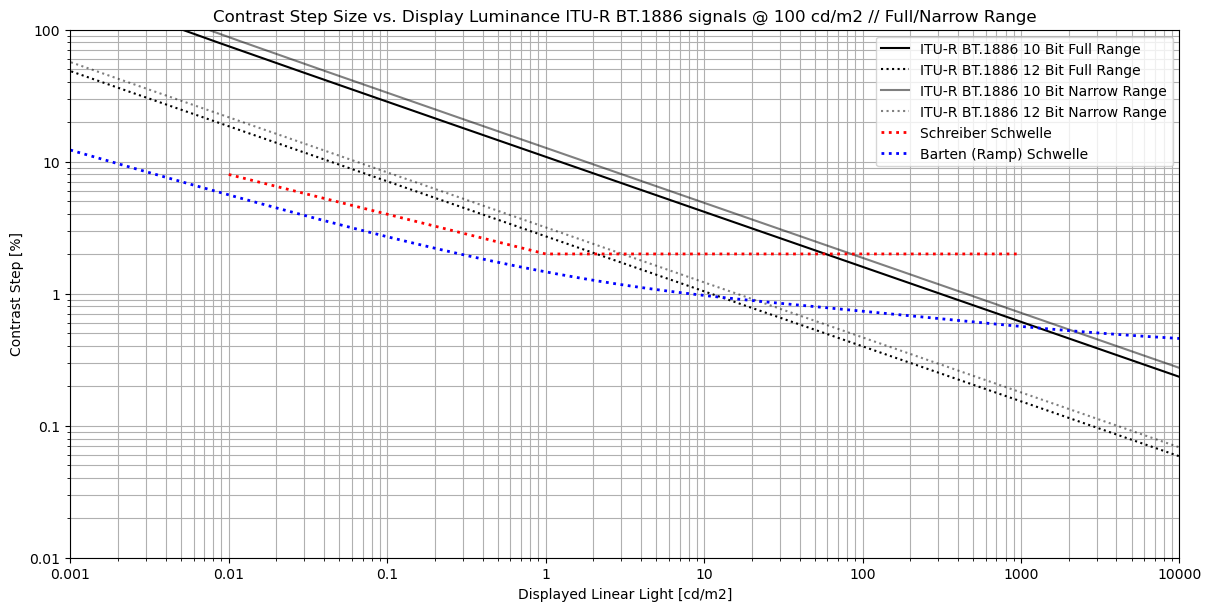

In [7]:
figR, ((axT)) = plt.subplots(1, 1, figsize=(12, (30/5)), constrained_layout=True)
axT.grid(visible=True,which="both")


x = np.linspace(0,1023,1024)
x1 = np.linspace(0,4095,4096)

x_hlg = np.linspace(0,1022,1023)
x1_hlg = np.linspace(0,4094,4095)

x_1 = np.linspace(0,875,876)
x1_1 = np.linspace(0,3503,3504)
x2 = np.linspace(0,1022,1023)

x11 = np.logspace(np.log10(0.001), np.log10(10000), 1023)

def ableitung_bt1886_10bit(x):
    a = np.gradient(c.models.eotf_BT1886(x/1023), (x/1023))
    b = np.multiply(a,np.divide(1,1023))
    z = (x/1023)**2.4*100
    d = np.divide(b,z)
    e = np.multiply(d,100*100)
    return e

def ableitung_bt1886_12bit(x):
    a = np.gradient(c.models.eotf_BT1886(x/4095), (x/4095))
    b = np.multiply(a,np.divide(1,4095))
    z = (x/4095)**2.4*100
    d = np.divide(b,z)
    e = np.multiply(d,100*100)
    return e

def ableitung_st2084_10bit(x):
    x = x/1023
    a = np.divide(np.multiply(np.multiply(6.27739,np.add(np.multiply(np.multiply(1.0842021724855044,np.power(10.0,-19)),np.power(x,0.0126833)),0.000117309)),np.power(np.divide(np.subtract(np.power(x,0.0126833),0.835938),np.subtract(18.8516,np.multiply(18.6875,np.power(x,0.0126833)))),5.277394636015)),np.multiply(np.power(x,0.987317),np.power(np.subtract(1.00878,np.power(x,0.0126833)),2)))
    b = np.multiply(a,np.divide(1,1023))
    z = c.models.eotf_ST2084(x)
    d = np.divide(b,z)
    e = np.multiply(d,10000*100)
    return e

def ableitung_st2084_12bit(x):
    x = x/4095
    a = np.divide(np.multiply(np.multiply(6.27739,np.add(np.multiply(np.multiply(1.0842021724855044,np.power(10.0,-19)),np.power(x,0.0126833)),0.000117309)),np.power(np.divide(np.subtract(np.power(x,0.0126833),0.835938),np.subtract(18.8516,np.multiply(18.6875,np.power(x,0.0126833)))),5.277394636015)),np.multiply(np.power(x,0.987317),np.power(np.subtract(1.00878,np.power(x,0.0126833)),2)))
    b = np.multiply(a,np.divide(1,4095))
    z = c.models.eotf_ST2084(x)
    d = np.divide(b,z)
    e = np.multiply(d,10000*100)
    return e

def ableitung_bt1886_10bit_narrow(x):
    a = np.gradient(c.models.eotf_BT1886(x/875), (x/875))
    b = np.multiply(a,np.divide(1,875))
    z = (x/875)**2.4*100
    d = np.divide(b,z)
    e = np.multiply(d,100*100)
    return e

def ableitung_bt1886_12bit_narrow(x):
    a = np.gradient(c.models.eotf_BT1886(x/3503), (x/3503))
    b = np.multiply(a,np.divide(1,3503))
    z = (x/3503)**2.4*100
    d = np.divide(b,z)
    e = np.multiply(d,100*100)
    return e

def ableitung_st2084_10bit_narrow(x):
    x = x/875
    a = np.divide(np.multiply(np.multiply(6.27739,np.add(np.multiply(np.multiply(1.0842021724855044,np.power(10.0,-19)),np.power(x,0.0126833)),0.000117309)),np.power(np.divide(np.subtract(np.power(x,0.0126833),0.835938),np.subtract(18.8516,np.multiply(18.6875,np.power(x,0.0126833)))),5.277394636015)),np.multiply(np.power(x,0.987317),np.power(np.subtract(1.00878,np.power(x,0.0126833)),2)))
    b = np.multiply(a,np.divide(1,875))
    z = c.models.eotf_ST2084(x)
    d = np.divide(b,z)
    e = np.multiply(d,10000*100)
    return e

def ableitung_st2084_12bit_narrow(x):
    x = x/3503
    a = np.divide(np.multiply(np.multiply(6.27739,np.add(np.multiply(np.multiply(1.0842021724855044,np.power(10.0,-19)),np.power(x,0.0126833)),0.000117309)),np.power(np.divide(np.subtract(np.power(x,0.0126833),0.835938),np.subtract(18.8516,np.multiply(18.6875,np.power(x,0.0126833)))),5.277394636015)),np.multiply(np.power(x,0.987317),np.power(np.subtract(1.00878,np.power(x,0.0126833)),2)))
    b = np.multiply(a,np.divide(1,3503))
    z = c.models.eotf_ST2084(x)
    d = np.divide(b,z)
    e = np.multiply(d,10000*100)
    return e


def ableitung_bt2100hlg_10bit_1000(x):

    def f(variab):
        return c.models.eotf_HLG_BT2100(variab,0,1000)
    lin = np.linspace(0, 1, 32123)
    lin_eotf = c.models.eotf_HLG_BT2100(lin,0,1000)
    dfdx = np.gradient(f(lin), lin)
    
    x = x/1023
    a = np.linspace(0,1,1024)

    test_dict = {}
    for A, B in zip(lin_eotf, dfdx):
        test_dict[A] = B

    for i in range(0,1024):
        search_key = c.models.eotf_HLG_BT2100(i/1023,0,1000)
        a[i]= test_dict.get(search_key) or test_dict[min(test_dict.keys(), key = lambda key: abs(key-search_key))]/1000
    
    b = np.multiply(a,np.divide(1,1023))
    z = c.models.eotf_HLG_BT2100(x,0,1000)
    d = np.divide(b,z)
    e = np.multiply(d,1000*100)
    return e


def ableitung_bt2100hlg_10bit_500(x):

    def f(variab):
        return c.models.eotf_HLG_BT2100(variab,0,500)
    lin = np.linspace(0, 1, 32123)
    lin_eotf = c.models.eotf_HLG_BT2100(lin,0,500)
    dfdx = np.gradient(f(lin), lin)
    
    x = x/1023
    a = np.linspace(0,1,1024)

    test_dict = {}
    for A, B in zip(lin_eotf, dfdx):
        test_dict[A] = B

    for i in range(0,1024):
        search_key = c.models.eotf_HLG_BT2100(i/1023,0,500)
        a[i]= test_dict.get(search_key) or test_dict[min(test_dict.keys(), key = lambda key: abs(key-search_key))]/1000
    
    b = np.multiply(a,np.divide(1,1023))
    z = c.models.eotf_HLG_BT2100(x,0,500)
    d = np.divide(b,z)
    e = np.multiply(d,500*100)
    return e

def ableitung_bt2100hlg_10bit_2000(x):

    def f(variab):
        return c.models.eotf_HLG_BT2100(variab,0,2000)
    lin = np.linspace(0, 1, 32123)
    lin_eotf = c.models.eotf_HLG_BT2100(lin,0,2000)
    dfdx = np.gradient(f(lin), lin)
    
    x = x/1023
    a = np.linspace(0,1,1024)

    test_dict = {}
    for A, B in zip(lin_eotf, dfdx):
        test_dict[A] = B

    for i in range(0,1024):
        search_key = c.models.eotf_HLG_BT2100(i/1023,0,2000)
        a[i]= test_dict.get(search_key) or test_dict[min(test_dict.keys(), key = lambda key: abs(key-search_key))]/1000
    
    b = np.multiply(a,np.divide(1,1023))
    z = c.models.eotf_HLG_BT2100(x,0,2000)
    d = np.divide(b,z)
    e = np.multiply(d,2000*100)
    return e

def ableitung_bt2100hlg_12bit_1000(x):

    def f(variab):
        return c.models.eotf_HLG_BT2100(variab,0,1000)
    lin = np.linspace(0, 1, 32123)
    lin_eotf = c.models.eotf_HLG_BT2100(lin,0,1000)
    dfdx = np.gradient(f(lin), lin)
    
    x = x/4095
    a = np.linspace(0,1,4096)

    test_dict = {}
    for A, B in zip(lin_eotf, dfdx):
        test_dict[A] = B

    for i in range(0,4096):
        search_key = c.models.eotf_HLG_BT2100(i/4095,0,1000)
        a[i]= test_dict.get(search_key) or test_dict[min(test_dict.keys(), key = lambda key: abs(key-search_key))]/1000
    
    b = np.multiply(a,np.divide(1,4095))
    z = c.models.eotf_HLG_BT2100(x,0,1000)
    d = np.divide(b,z)
    e = np.multiply(d,1000*100)
    return e

def ableitung_bt2100hlg_12bit_500(x):

    def f(variab):
        return c.models.eotf_HLG_BT2100(variab,0,500)
    lin = np.linspace(0, 1, 32123)
    lin_eotf = c.models.eotf_HLG_BT2100(lin,0,500)
    dfdx = np.gradient(f(lin), lin)
    
    x = x/4095
    a = np.linspace(0,1,4096)

    test_dict = {}
    for A, B in zip(lin_eotf, dfdx):
        test_dict[A] = B

    for i in range(0,4096):
        search_key = c.models.eotf_HLG_BT2100(i/4095,0,500)
        a[i]= test_dict.get(search_key) or test_dict[min(test_dict.keys(), key = lambda key: abs(key-search_key))]/1000
    
    b = np.multiply(a,np.divide(1,4095))
    z = c.models.eotf_HLG_BT2100(x,0,500)
    d = np.divide(b,z)
    e = np.multiply(d,500*100)
    return e

def ableitung_bt2100hlg_12bit_2000(x):

    def f(variab):
        return c.models.eotf_HLG_BT2100(variab,0,2000)
    lin = np.linspace(0, 1, 32123)
    lin_eotf = c.models.eotf_HLG_BT2100(lin,0,2000)
    dfdx = np.gradient(f(lin), lin)
    
    x = x/4095
    a = np.linspace(0,1,4096)

    test_dict = {}
    for A, B in zip(lin_eotf, dfdx):
        test_dict[A] = B

    for i in range(0,4096):
        search_key = c.models.eotf_HLG_BT2100(i/4095,0,2000)
        a[i]= test_dict.get(search_key) or test_dict[min(test_dict.keys(), key = lambda key: abs(key-search_key))]/1000
    
    b = np.multiply(a,np.divide(1,4095))
    z = c.models.eotf_HLG_BT2100(x,0,2000)
    d = np.divide(b,z)
    e = np.multiply(d,2000*100)
    return e







def ableitung_bt2100hlg_10bit_1000_NR(x):

    def f(variab):
        return c.models.eotf_HLG_BT2100(variab,0,1000)
    lin = np.linspace(0, 1, 32123)
    lin_eotf = c.models.eotf_HLG_BT2100(lin,0,1000)
    dfdx = np.gradient(f(lin), lin)
    
    x = x/875
    a = np.linspace(0,1,876)

    test_dict = {}
    for A, B in zip(lin_eotf, dfdx):
        test_dict[A] = B

    for i in range(0,876):
        search_key = c.models.eotf_HLG_BT2100(i/875,0,1000)
        a[i]= test_dict.get(search_key) or test_dict[min(test_dict.keys(), key = lambda key: abs(key-search_key))]/1000
    
    b = np.multiply(a,np.divide(1,875))
    z = c.models.eotf_HLG_BT2100(x,0,1000)
    d = np.divide(b,z)
    e = np.multiply(d,1000*100)
    return e

def ableitung_bt2100hlg_10bit_500_NR(x):

    def f(variab):
        return c.models.eotf_HLG_BT2100(variab,0,500)
    lin = np.linspace(0, 1, 55555)
    lin_eotf = c.models.eotf_HLG_BT2100(lin,0,500)
    dfdx = np.gradient(f(lin), lin)
    
    x = x/875
    a = np.linspace(0,1,876)

    test_dict = {}
    for A, B in zip(lin_eotf, dfdx):
        test_dict[A] = B

    for i in range(0,876):
        search_key = c.models.eotf_HLG_BT2100(i/875,0,500)
        a[i]= test_dict.get(search_key) or test_dict[min(test_dict.keys(), key = lambda key: abs(key-search_key))]/1000
    
    b = np.multiply(a,np.divide(1,875))
    z = c.models.eotf_HLG_BT2100(x,0,500)
    d = np.divide(b,z)
    e = np.multiply(d,500*100)
    return e

def ableitung_bt2100hlg_10bit_2000_NR(x):

    def f(variab):
        return c.models.eotf_HLG_BT2100(variab,0,2000)
    lin = np.linspace(0, 1, 32123)
    lin_eotf = c.models.eotf_HLG_BT2100(lin,0,2000)
    dfdx = np.gradient(f(lin), lin)
    
    x = x/875
    a = np.linspace(0,1,876)

    test_dict = {}
    for A, B in zip(lin_eotf, dfdx):
        test_dict[A] = B

    for i in range(0,876):
        search_key = c.models.eotf_HLG_BT2100(i/875,0,2000)
        a[i]= test_dict.get(search_key) or test_dict[min(test_dict.keys(), key = lambda key: abs(key-search_key))]/1000
    
    b = np.multiply(a,np.divide(1,875))
    z = c.models.eotf_HLG_BT2100(x,0,2000)
    d = np.divide(b,z)
    e = np.multiply(d,2000*100)
    return e

def ableitung_bt2100hlg_12bit_1000_NR(x):

    def f(variab):
        return c.models.eotf_HLG_BT2100(variab,0,1000)
    lin = np.linspace(0, 1, 32123)
    lin_eotf = c.models.eotf_HLG_BT2100(lin,0,1000)
    dfdx = np.gradient(f(lin), lin)
    
    x = x/3503
    a = np.linspace(0,1,3504)

    test_dict = {}
    for A, B in zip(lin_eotf, dfdx):
        test_dict[A] = B

    for i in range(0,3504):
        search_key = c.models.eotf_HLG_BT2100(i/3503,0,1000)
        a[i]= test_dict.get(search_key) or test_dict[min(test_dict.keys(), key = lambda key: abs(key-search_key))]/1000
    
    b = np.multiply(a,np.divide(1,3503))
    z = c.models.eotf_HLG_BT2100(x,0,1000)
    d = np.divide(b,z)
    e = np.multiply(d,1000*100)
    return e

def ableitung_bt2100hlg_12bit_500_NR(x):

    def f(variab):
        return c.models.eotf_HLG_BT2100(variab,0,500)
    lin = np.linspace(0, 1, 32123)
    lin_eotf = c.models.eotf_HLG_BT2100(lin,0,500)
    dfdx = np.gradient(f(lin), lin)
    
    x = x/3503
    a = np.linspace(0,1,3504)

    test_dict = {}
    for A, B in zip(lin_eotf, dfdx):
        test_dict[A] = B

    for i in range(0,3504):
        search_key = c.models.eotf_HLG_BT2100(i/3503,0,500)
        a[i]= test_dict.get(search_key) or test_dict[min(test_dict.keys(), key = lambda key: abs(key-search_key))]/1000
    
    b = np.multiply(a,np.divide(1,3503))
    z = c.models.eotf_HLG_BT2100(x,0,500)
    d = np.divide(b,z)
    e = np.multiply(d,500*100)
    return e

def ableitung_bt2100hlg_12bit_2000_NR(x):

    def f(variab):
        return c.models.eotf_HLG_BT2100(variab,0,2000)
    lin = np.linspace(0, 1, 32123)
    lin_eotf = c.models.eotf_HLG_BT2100(lin,0,2000)
    dfdx = np.gradient(f(lin), lin)
    
    x = x/3503
    a = np.linspace(0,1,3504)

    test_dict = {}
    for A, B in zip(lin_eotf, dfdx):
        test_dict[A] = B

    for i in range(0,3504):
        search_key = c.models.eotf_HLG_BT2100(i/3503,0,2000)
        a[i]= test_dict.get(search_key) or test_dict[min(test_dict.keys(), key = lambda key: abs(key-search_key))]/1000
    
    b = np.multiply(a,np.divide(1,3503))
    z = c.models.eotf_HLG_BT2100(x,0,2000)
    d = np.divide(b,z)
    e = np.multiply(d,2000*100)
    return e

axT.plot(c.models.eotf_BT1886(x/1023)*10000, ableitung_bt1886_10bit(x), color='black',linestyle="-",label="ITU-R BT.1886 10 Bit Full Range")
axT.plot(c.models.eotf_BT1886(x1/4095)*10000, ableitung_bt1886_12bit(x1), color='black',linestyle=":",label="ITU-R BT.1886 12 Bit Full Range")
axT.plot(c.models.eotf_BT1886(x_1/875)*10000, ableitung_bt1886_10bit_narrow(x_1), color='black',linestyle="-",alpha=0.5,label="ITU-R BT.1886 10 Bit Narrow Range")
axT.plot(c.models.eotf_BT1886(x1_1/3503)*10000, ableitung_bt1886_12bit_narrow(x1_1), color='black',linestyle=":",alpha=0.5,label="ITU-R BT.1886 12 Bit Narrow Range")

axT.plot([0.01,1,1000],[8,2,2],color="red",linestyle=":",alpha=1,linewidth=2.0,label="Schreiber Schwelle")
axT.plot(x11,Invers_CSF_Barten_BT2246(np.logspace(np.log10(0.001), np.log10(100), 1023),X_0=60)*200,color="blue",linestyle=":",alpha=1,linewidth=2.0,label="Barten (Ramp) Schwelle")

axT.set_title('Contrast Step Size vs. Display Luminance ITU-R BT.1886 signals @ 100 cd/m2 // Full/Narrow Range')
axT.set_xlabel('Displayed Linear Light [cd/m2]')
axT.set_ylabel('Contrast Step [%]')
axT.set_xlim(0.001,10000) 
axT.set_ylim(00.1,100) 
axT.set_xscale('log', base=10)
axT.set_yscale('log', base=10)

axT.set_xticks([0.001,0.01,0.1,1,10,100,1000,10000],[0.001,0.01,0.1,1,10,100,1000,10000])
axT.set_yticks([0.01,0.1,1,10,100],[0.01,0.1,1,10,100])
axT.legend()


In [ ]:
axT.plot(c.models.eotf_BT1886(x/1023)*100, ableitung_bt1886_10bit(x), color='black',linestyle="-",label="ITU-R BT.1886 10 Bit Full Range")
axT.plot(c.models.eotf_BT1886(x1/4095)*100, ableitung_bt1886_12bit(x1), color='black',linestyle=":",label="ITU-R BT.1886 12 Bit Full Range")
axT.plot(c.models.eotf_BT1886(x_1/875)*100, ableitung_bt1886_10bit_narrow(x_1), color='black',linestyle="-",alpha=0.5,label="ITU-R BT.1886 10 Bit Narrow Range")
axT.plot(c.models.eotf_BT1886(x1_1/3503)*100, ableitung_bt1886_12bit_narrow(x1_1), color='black',linestyle=":",alpha=0.5,label="ITU-R BT.1886 12 Bit Narrow Range")

In [20]:
def ableitung_bt2100hlg_eotf_inverse_10bit_1000(x):

    def f(variab):
        return c.models.eotf_inverse_HLG_BT2100(variab,0,1000)
    lin = np.linspace(0, 1000, 32123)
    lin_eotf_inverse = c.models.eotf_inverse_HLG_BT2100(lin,0,1000)
    dfdx = np.gradient(f(lin), lin)
    
    x = x/1023
    a = np.linspace(0,1,1024)

    test_dict = {}
    for A, B in zip(lin_eotf_inverse, dfdx):
        test_dict[A] = B

    for i in range(0,1024):
        search_key = c.models.eotf_inverse_HLG_BT2100(i/1023*1000,0,1000)
        a[i]= test_dict.get(search_key) or test_dict[min(test_dict.keys(), key = lambda key: abs(key-search_key))]
    
    return e

In [21]:
ableitung_bt2100hlg_eotf_inverse_10bit_1000(np.linspace(100,1000,1024))

array([  1.94927921e+03,   1.09190886e+02,   7.19296661e+01, ...,
         1.55081391e-01,   1.54866761e-01,   1.54660005e-01])

In [22]:

def f(variab):
        return c.models.eotf_inverse_HLG_BT2100(variab,0,1000)
lin = np.linspace(0, 1000, 32123)
lin_eotf_inverse = c.models.eotf_inverse_HLG_BT2100(lin,0,1000)
dfdx = np.gradient(f(lin), lin)

In [32]:
raster_luminance = c.models.eotf_HLG_BT2100(np.linspace(0,1023,1024)/1023,0,1000)

/Users/justus/.local/lib/python3.9/site-packages/colour/utilities/verbose.py:262: ColourUsageWarning: "Recommendation ITU-R BT.2100" "Reference HLG OOTF" uses RGB Luminance in computations and expects a vector input, thus the given input array will be stacked to compose a vector for internal computations but a single component will be output.
  warn(*args, **kwargs)


In [36]:
np.gradient(c.models.eotf_inverse_HLG_BT2100(raster_luminance,0,1000))

/Users/justus/.local/lib/python3.9/site-packages/colour/utilities/verbose.py:262: ColourUsageWarning: "Recommendation ITU-R BT.2100" "Reference HLG OOTF" uses RGB Luminance in computations and expects a vector input, thus the given input array will be stacked to compose a vector for internal computations but a single component will be output.
  warn(*args, **kwargs)
/Users/justus/.local/lib/python3.9/site-packages/colour/models/rgb/transfer_functions/itur_bt_2100.py:1525: RuntimeWarning: divide by zero encountered in power
  Y_D_alpha = np.abs(Y_D / alpha) ** ((1 - gamma) / gamma)
/Users/justus/.local/lib/python3.9/site-packages/colour/models/rgb/transfer_functions/itur_bt_2100.py:1530: RuntimeWarning: invalid value encountered in multiply
  Y_D_alpha * R_D / alpha,
/Users/justus/.local/lib/python3.9/site-packages/colour/models/rgb/transfer_functions/itur_bt_2100.py:1535: RuntimeWarning: invalid value encountered in multiply
  Y_D_alpha * G_D / alpha,
/Users/justus/.local/lib/python3.9

array([ 0.00097752,  0.00097752,  0.00097752, ...,  0.00097752,
        0.00097752,  0.00097752])

In [28]:
np.gradient([1,2,1])

array([ 1.,  0., -1.])

In [23]:
print(dfdx)

[  7.37104051e-01   4.91957932e-01   2.13952529e-01 ...,   1.52658196e-04
   1.52653347e-04   1.52650923e-04]


In [57]:
np.polyfit([c.models.eotf_HLG_BT2100(1/1023,0,1000),c.models.eotf_HLG_BT2100(1/1023+0.01,0,1000)], [1/1023, 1/1023+0.01], 1)

array([  1.89080345e+00,   9.47289806e-04])

TypeError: 'numpy.ndarray' object is not callable

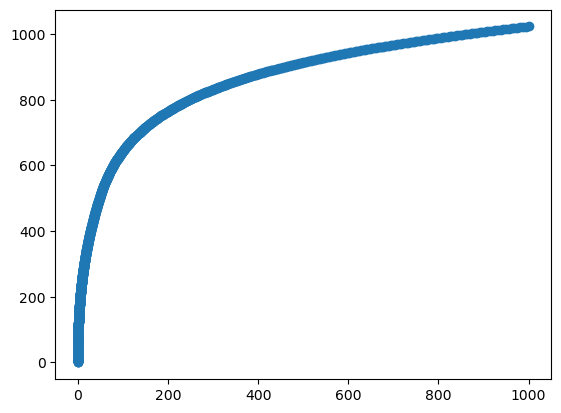

In [84]:
x = np.linspace(0,1023,1024)
slope = x
plt.scatter(c.models.eotf_HLG_BT2100(x/1023,0,1000),x)
for i in range(0,1024):
    slope_1, intercept = np.polyfit([c.models.eotf_HLG_BT2100(i/1023,0,1000),c.models.eotf_HLG_BT2100(i/1023+0.01,0,1000)], [i/1023, i/1023+0.01], 1)
    slope[i] = slope_1
print(slope)
plt.scatter(x,slope)

In [81]:
print(slope)

[  2.35800926e+00   1.89080345e+00   1.55628577e+00 ...,   1.49545240e-04
   1.48571315e-04   1.47603712e-04]


In [83]:
range2 = c.models.eotf_HLG_BT2100(x/1023,0,1000)

/Users/justus/.local/lib/python3.9/site-packages/colour/utilities/verbose.py:262: ColourUsageWarning: "Recommendation ITU-R BT.2100" "Reference HLG OOTF" uses RGB Luminance in computations and expects a vector input, thus the given input array will be stacked to compose a vector for internal computations but a single component will be output.
  warn(*args, **kwargs)


/Users/justus/.local/lib/python3.9/site-packages/colour/utilities/verbose.py:262: ColourUsageWarning: "Recommendation ITU-R BT.2100" "Reference HLG OOTF" uses RGB Luminance in computations and expects a vector input, thus the given input array will be stacked to compose a vector for internal computations but a single component will be output.
  warn(*args, **kwargs)


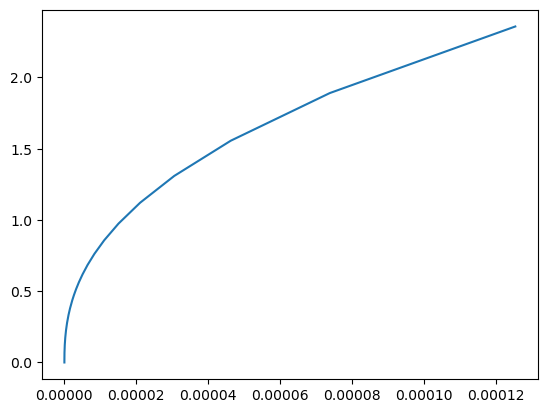

In [80]:
plt.plot(slope)

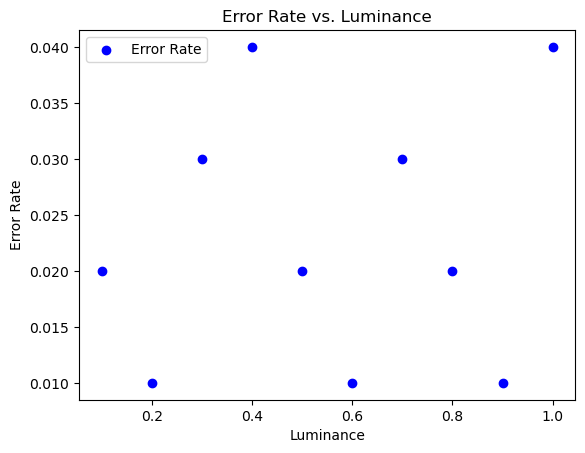

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Example luminance values and corresponding error rates
luminance_values = np.array([[0.1, 0.2, 0.3, 0.4, 0.5],
                             [0.6, 0.7, 0.8, 0.9, 1.0]])

error_rates = np.array([[0.02, 0.01, 0.03, 0.04, 0.02],
                        [0.01, 0.03, 0.02, 0.01, 0.04]])

# Flatten the arrays for plotting
luminance_flat = luminance_values.flatten()
error_rates_flat = error_rates.flatten()

# Create a scatter plot
plt.scatter(luminance_flat, error_rates_flat, marker='o', color='blue', label='Error Rate')

# Set plot labels and title
plt.xlabel('Luminance')
plt.ylabel('Error Rate')
plt.title('Error Rate vs. Luminance')

# Display legend
plt.legend()

# Show the plot
plt.show()


In [6]:

## Linear to sRGB
def lin2srgb (x):
    result = (x <= 0.0031308) * np.multiply(x,12.92) + (x > 0.0031308) * np.subtract(np.multiply(1.055,np.power(x,(1/2.4))),0.055)
    return result


## sRGB to Linear 
def srgb2lin (x):
    result = (x <= 0.04045) * np.divide(x,12.92) + (x > 0.04045) * np.power(np.divide(np.add(x,0.055),1.055),2.4)
    return result

# SDR Formulas

## Input Luminance between 0-1
## Output Videosignal
def oetf709(x): 
    return np.subtract(np.multiply(np.power(x, 0.45), 1.099), 0.099)*(0.018<= x) + np.multiply(4.5, x) * (x <0.018)

def eotf1886(x, Lw = 100, Lb = 0): 
    gamma = 2.4
    a = np.power(np.subtract(np.power(Lw, np.divide(1,gamma)),np.power(Lb, np.divide(1, gamma))), gamma)
    b = np.divide(np.power(Lb, np.divide(1,gamma)) , np.subtract(np.power(Lw , np.divide(1,gamma)), np.power( Lb , np.divide(1, gamma))))
    return np.multiply(a , np.power( np.maximum(np.add(x, b), 0) , gamma))

def eotf1886_CRT(x, Lw = 100, Lb = 0, b = 0): 
    Vc = 0.35
    a1 = 2.6
    a2 = 3.0
    k = np.subtract(Lw,np.power(np.add(1,b),a1))
    return (x < Vc) * np.multiply(np.multiply(k,np.power(np.add(Vc,b),np.subtract(a1,a2))),np.power(np.add(x,b),a2)) + (Vc <= x) * np.multiply(k,np.power(np.add(x,b),a1))

## Luma Formulas for Rec2020 / Rec709 -> Fixed Addition
def luma709(img): 
    return np.multiply(img[:,:,0],0.2126) + np.multiply(img[:,:,1],0.7152) + np.multiply(img[:,:,2],0.0722)
def luma2020(img): 
    return np.multiply(img[:,:,0],0.2627) + np.multiply(img[:,:,1],0.6780) + np.multiply(img[:,:,2],0.0593)

## Formulas for PQ

# increasing rec.709 formulas 
def steroids709(x): 
    return np.subtract(np.multiply(np.power(np.multiply(59.5208 , x), 0.45), 1.099), 0.099)*(0.0003024< x) + np.multiply(267.84, x) * (x <= 0.0003024)

def steroids1886(x): 
    return np.multiply(100, np.power(x, 2.4))


## Transportfunctions

def pq_eotf(x): 
    ##m1
    m1 = np.divide(2610, 16384) ## 2^14 = 16384
    m2 = np.multiply(np.divide(2523, 4096), 128) ##2^12 = 4096 , 2^7 = 128 -> Jan fragen
    c1 = np.divide(3424, 4096)
    c2 = np.multiply(np.divide(2413, 4096), 32)
    c3 = np.multiply(np.divide(2392, 4096), 32)

    
    return np.multiply(np.power(np.divide(np.maximum( np.subtract( np.power(x , np.divide(1 , m2)), c1) , 0) , np.subtract(c2, np.multiply(c3 , np.power(x , np.divide(1 , m2))))) , np.divide(1, m1)), 10000)

## Inverse_eotf

def pq_eotf_inv(x): 
    m1 = np.divide(2610, 16384) ## 2^14 = 16384
    m2 = np.multiply(np.divide(2523, 4096), 128) ##2^12 = 4096 , 2^7 = 128 -> Jan fragen
    c1 = np.divide(3424, 4096)
    c2 = np.multiply(np.divide(2413, 4096), 32)
    c3 = np.multiply(np.divide(2392, 4096), 32)

    y = np.divide(x , 10000) ## Normalisierung auf 0.00 bis 1.0

    return np.power( np.divide(np.add(c1 , np.multiply(c2 , np.power(y , m1))), np.add(1 , np.multiply(c3 , np.power(y , m1)))), m2)

# RGB Input
def hlg_oetf(x): 
    a = 0.17883277
    b = np.subtract(1 , np.multiply(4 , a))
    c = np.subtract(0.5 , np.multiply(a , np.log(np.multiply(4 , a))))

    return np.where(x <= np.divide(1,12), np.sqrt(np.multiply(3,x )), np.add( np.multiply(a , np.log(np.subtract( np.multiply(12 , x ), b))) , c) )

def hlg_oetf_inv(x):
    a = 0.17883277
    b = np.subtract(1 , np.multiply(4 , a))
    c = np.subtract(0.5 , np.multiply(a , np.log(np.multiply(4 , a))))
    
    return np.where(x <= 0.5 , np.divide( np.power(x,2), 3), np.divide(np.add(np.exp(np.divide(np.subtract(x , c), a)), b) , 12) )

## Lw = Usergain, nominal peak Luminance of the display (achromatic)
def hlg_ootf(x, Lw): 
    r = x[: , : , 0]
    g = x[: , : , 1]
    b = x[: , : , 2]
    luma = np.add(np.multiply(0.2627 ,r ), np.multiply(0.678 , g), np.multiply(0.0593 , b))
    alpha = Lw
    gamma = np.add(1.2, np.multiply(0.42 , np.log10(np.divide(Lw,1000))))
    rd = np.multiply( alpha , np.power(luma , np.subtract(gamma , 1)), r)
    gd = np.multiply( alpha , np.power(luma , np.subtract(gamma , 1)), g)
    bd = np.multiply( alpha , np.power(luma , np.subtract(gamma , 1)), b)
    return np.stack((rd , gd , bd))

## Lw = Usergain, nominal peak Luminance of the display (achromatic)
def hlg_ootf_bw(x, Lw=1000): 
    alpha = Lw
    gamma = np.add(1.2, np.multiply(0.42 , np.log10(np.divide(Lw,1000))))
    return np.multiply(np.multiply( alpha , np.power(x , np.subtract(gamma , 1))),x)

def hlg_eotf(x, Lw = 1000, Lb = 0.005):
    gamma = np.add(1.2, np.multiply(0.42 , np.log10(np.divide(Lw,1000))))
    beta = np.sqrt(np.multiply(3 , np.power(np.divide(Lb , Lw), np.divide(1,gamma))))
    return hlg_ootf_bw(hlg_oetf_inv(np.maximum(0 , (np.add( np.multiply( np.subtract(1 , beta), x ), beta)))), Lw)


def slog3oetf(x): 
    # reflection add
    x = x*0.9

    return (x < 0.01125)* np.divide( np.add( np.multiply(x , np.divide(np.subtract(171.2102946929, 95), 0.01125)), 95), 1023) + (x >= 0.01125)* np.divide(np.add(420 , np.multiply( np.log10(np.divide(np.add(x,0.01), np.add(0.18, 0.01))), 261.5)), 1023)

def slog3eotf(x): 
    return (x >= np.divide(171.2102946929,1023)) * np.subtract( np.multiply(np.power(10 , np.divide( np.subtract(420 , np.multiply(x , 1023)) , 261.5)) , np.add(0.18 , 0.01)) , 0.01) + (x < np.divide(171.2102946929,1023)) * np.multiply(np.subtract(np.multiply(x , 1023), 95 ) , np.divide(0.01125 , np.subtract(171.2102946929 , 95)))

# These are the ARRI LogCv3 Formulas
def lin2logc(x):
    return np.multiply(x > 0.010591, 0.24719 * np.log10(5.555556 * x + 0.052272) + 0.385537) + np.multiply(x <= 0.010591, 5.367655 * x + 0.092809)
def logc2lin(x):
    return np.multiply(x > 0.149659, (np.power(10.0, (x - 0.385537) / 0.247189) - 0.052272) / 5.555556) + np.multiply(x <= 0.149659, (x - 0.092809) / 5.367650)


### LOG C4
def Encoding_LogC4(x):
    a = (np.power(2.0, 18.0) - 16.0) / 117.45
    b = (1023.0 - 95.0) / 1023.0
    c = 95.0 / 1023.0
    s = (7 * np.log(2) * np.power(2.0, 7 - 14 * c / b)) / (a * b)
    t = (np.power(2.0, 14.0 * (-c / b) + 6.0) - 64.0) / a
    return (x < t) * np.divide(np.subtract(x,t),s) + (x >= t) * np.add(np.multiply(np.divide( np.subtract(np.log2(np.add(np.multiply(a,x),64.0)),6.0),14.0),b),c)

def Decoding_LogC4(x):
    a = (np.power(2.0, 18.0) - 16.0) / 117.45
    b = (1023.0 - 95.0) / 1023.0
    c = 95.0 / 1023.0
    s = (7 * np.log(2) * np.power(2.0, 7 - 14 * c / b)) / (a * b)
    t = (np.power(2.0, 14.0 * (-c / b) + 6.0) - 64.0) / a
    return (x < 0.0) * np.add(np.multiply(x,s),t) + (x >= 0.0) * np.divide(np.subtract(np.power(2.0, np.add(np.multiply(14,np.divide(np.subtract(x,c),b)),6)),64.0),a)


def full2legal(x):
    return (219*(x)+16)*np.power(2,(10-8))

def legal2full(x):
    return (((x/np.power(2,(10-8)))-16)/219)

def lin2log2(x):
    return np.log2(x)

def log22lin(x):
    return np.power(2,x)

def Blenden_Differenz(num1, num2):
    new2 = num2 / num1
    return np.log2(new2)

def mse_calculation(imageA, imageB):
    # Expects Luma Images
	err = np.mean(np.square(np.subtract(imageA,imageB)))
	return err

In [7]:
def mse_calculation(imageA, imageB):
    # Expects Luma Images
	err = np.mean(np.square(np.subtract(imageA,imageB)))
	return err

from math import log10, sqrt 
import cv2 
import numpy as np
from skimage.metrics import structural_similarity as ssim_calculation

def PSNR_calculation(original, compressed): 

	# Expects Luma Images
	mse = mse_calculation(original,compressed)
	if(mse == 0): # MSE is zero means no noise is present in the signal . 
				# Therefore PSNR have no importance. 
		return 100
	max_pixel = 1023.0
	psnr = 20 * log10(max_pixel / sqrt(mse)) 
	return psnr 

def delta_E_ITP_calculation(original,compressed):

	# Recommendation ITU-R BT.2124-0
	# Expects Display-Linear RGB with 1 = 1 cd/m2
	L1 = (1688*original[:,:,0] + 2146*original[:,:,1] + 262*original[:,:,2])/4096
	M1 = (683*original[:,:,0] + 2951*original[:,:,1] + 462*original[:,:,2])/4096
	S1 = (99*original[:,:,0] + 309*original[:,:,1] + 3688*original[:,:,2])/4096

	L1_Mapped = c.models.eotf_inverse_ST2084(L1)
	M1_Mapped = c.models.eotf_inverse_ST2084(M1)
	S1_Mapped = c.models.eotf_inverse_ST2084(S1)

	I1 = 0.5*L1_Mapped+0.5*M1_Mapped
	CT1 =(6610*L1_Mapped - 13613*M1_Mapped + 7003*S1_Mapped)/4096
	CP1 =(17933*L1_Mapped - 17390*M1_Mapped - 543+S1_Mapped)/4096

	I1 = I1
	T1 = 0.5 * CT1
	P1 = CP1

	L2 = (1688*compressed[:,:,0] + 2146*compressed[:,:,1] + 262*compressed[:,:,2])/4096
	M2 = (683*compressed[:,:,0] + 2951*compressed[:,:,1] + 462*compressed[:,:,2])/4096
	S2 = (99*compressed[:,:,0] + 309*compressed[:,:,1] + 3688*compressed[:,:,2])/4096

	L2_Mapped = c.models.eotf_inverse_ST2084(L2)
	M2_Mapped = c.models.eotf_inverse_ST2084(M2)
	S2_Mapped = c.models.eotf_inverse_ST2084(S2)

	I2 = 0.5*L2_Mapped+0.5*M2_Mapped
	CT2 =(6610*L2_Mapped - 13613*M2_Mapped + 7003*S2_Mapped)/4096
	CP2 =(17933*L2_Mapped - 17390*M2_Mapped - 543+S2_Mapped)/4096

	I2 = I2
	T2 = 0.5 * CT2
	P2 = CP2

	return np.multiply(720,np.sqrt(np.add(np.power(np.subtract(I1,I2),2),np.add(np.power(np.subtract(T1,T2),2),np.power(np.subtract(P1,P2),2)))))

def delta_E_ITP_visualisation(delta_array, image, factor):
    container = np.zeros((len(delta_array[:, 0]), len(delta_array[0, :]), 3))
    mask1 = 1 >= delta_array
    mask2 = 1 <= delta_array
    mask3 = 2 < delta_array
    mask4 = 3 < delta_array
    mask5 = 4 < delta_array

    container[mask1] = [0, 0, 1]
    container[mask2] = [0, 1, 1]
    container[mask3] = [0, 1, 0]
    container[mask4] = [1, 1, 0]
    container[mask5] = [1, 0, 0]

    return image * (1 - factor) + container * factor

# SSIM expects Luma Values!!
def Auswertung_Encoding_PQ_UHD_vs_Luminance(ref,ref_encoding,comp,comp_encoding,L_min_hlg=0,L_max_hlg=1000):

    ref_name = ref
    comp_name = comp

    ref = c.read_image(ref)
    comp = c.read_image(comp)

    if ref_encoding == "pq_full":
        ref_display_linear = np.clip(c.models.eotf_ST2084(np.divide(np.round(np.multiply(ref,1023),4),1023)),0,100000)

    elif ref_encoding == "pq_narrow":
        ref_display_linear = np.clip(c.models.eotf_ST2084(np.divide(np.round(np.multiply((ref-0.0427253)*1/(0.9393-0.0427253),1023),4),1023)),0,100000)

    elif ref_encoding == "hlg_full":
        ref_display_linear = np.clip(c.models.eotf_HLG_BT2100(np.divide(np.round(np.multiply(ref,1023),4),1023),L_min_hlg,1000),0,100000)

    elif ref_encoding == "hlg_narrow":
        ref_display_linear = np.clip(c.models.eotf_HLG_BT2100(np.divide(np.round(np.multiply((ref-0.0427253)*1/(0.9393-0.0427253),1023),4),1023),0,1000),0,100000)

    if comp_encoding == "pq_full":
        comp_display_linear = np.clip(c.models.eotf_ST2084(np.divide(np.round(np.multiply(comp,1023),4),1023)),0,100000)

    elif comp_encoding == "pq_narrow":
        comp_display_linear = np.clip(c.models.eotf_ST2084(np.divide(np.round(np.multiply((comp-0.0427253)*1/(0.9393-0.0427253),1023),4),1023)),0,100000)

    elif comp_encoding == "hlg_full":
        comp_display_linear = np.clip(c.models.eotf_HLG_BT2100(np.divide(np.round(np.multiply(comp,1023),4),1023),0,1000),0,100000)

    elif comp_encoding == "hlg_narrow":
        comp_display_linear = np.clip(c.models.eotf_HLG_BT2100(np.divide(np.round(np.multiply((comp-0.0427253)*1/(0.9393-0.0427253),1023),4),1023),0,1000),0,100000)

    ref_display_linear_luma2020 = luma2020(ref_display_linear)
    comp_display_linear_luma2020 = luma2020(comp_display_linear)

    # Calculation of Minimum delta E
    delta_e_array = delta_E_ITP_calculation(ref_display_linear,comp_display_linear)
    luminance_flat = ref_display_linear_luma2020.flatten()
    
    error_rates_flat = delta_e_array.flatten()

    # Calculation of Minimum delta E
    delta_e_array = delta_E_ITP_calculation(ref_display_linear,comp_display_linear)

    plt.scatter(luminance_flat, error_rates_flat, marker='o', color='blue', label='Error Rate')

    # Set plot labels and title
    plt.xlabel('Luminance')
    plt.ylabel('Error Rate')
    plt.title('Error Rate vs. Luminance')

def Auswertung_Encoding_PQ_HD_vs_Luminance(ref,ref_encoding,comp,comp_encoding,L_min_hlg=0,L_max_hlg=1000):

    ref_name = ref
    comp_name = comp

    ref = c.read_image(ref)
    comp = c.read_image(comp)

    
    
    if ref_encoding == "pq_full":
        ref_display_linear = np.clip(c.models.eotf_ST2084(np.divide(np.round(np.multiply(ref,1023),4),1023)),0,100000)

    elif ref_encoding == "pq_narrow":
        ref_display_linear = np.clip(c.models.eotf_ST2084(np.divide(np.round(np.multiply((ref-0.0427253)*1/(0.9393-0.0427253),1023),4),1023)),0,100000)

    elif ref_encoding == "hlg_full":
        ref_display_linear = np.clip(c.models.eotf_HLG_BT2100(np.divide(np.round(np.multiply(ref,1023),4),1023),L_min_hlg,1000),0,100000)

    elif ref_encoding == "hlg_narrow":
        ref_display_linear = np.clip(c.models.eotf_HLG_BT2100(np.divide(np.round(np.multiply((ref-0.0427253)*1/(0.9393-0.0427253),1023),4),1023),0,1000),0,100000)

    if comp_encoding == "pq_full":
        comp_display_linear = np.clip(c.models.eotf_ST2084(np.divide(np.round(np.multiply(comp,1023),4),1023)),0,100000)

    elif comp_encoding == "pq_narrow":
        comp_display_linear = np.clip(c.models.eotf_ST2084(np.divide(np.round(np.multiply((comp-0.0427253)*1/(0.9393-0.0427253),1023),4),1023)),0,100000)

    elif comp_encoding == "hlg_full":
        comp_display_linear = np.clip(c.models.eotf_HLG_BT2100(np.divide(np.round(np.multiply(comp,1023),4),1023),0,1000),0,100000)

    elif comp_encoding == "hlg_narrow":
        comp_display_linear = np.clip(c.models.eotf_HLG_BT2100(np.divide(np.round(np.multiply((comp-0.0427253)*1/(0.9393-0.0427253),1023),4),1023),0,1000),0,100000)

    ref_display_linear_luma2020 = luma2020(ref_display_linear)
    comp_display_linear_luma2020 = luma2020(comp_display_linear)

    luminance_flat = ref_display_linear_luma2020.flatten()
    error_rates_flat = delta_e_array.flatten()

    # Calculation of Minimum delta E
    delta_e_array = delta_E_ITP_calculation(ref_display_linear,comp_display_linear)

    plt.scatter(luminance_flat, error_rates_flat, marker='o', color='blue', label='Error Rate')

    # Set plot labels and title
    plt.xlabel('Luminance')
    plt.ylabel('Error Rate')
    plt.title('Error Rate vs. Luminance')


In [9]:
root = '/Volumes/jm_HDD/jm_MA_V1/CONTENT/41_TIFF_EXTRACTION_NEW/01.1_ARRI_Encounters_PQ_UHD_FR'
ref_root = "/Volumes/jm_HDD/jm_MA_V1/CONTENT/01_TIFF_ORIGINALS/01.1_ARRI_Encounters_PQ_UHD_FR"


for i in range(1,18):
    number = "{:04d}".format(i)

    pattern1 = f"V1-{number}*"
    pattern2 = f"Co*"
    pattern3 = f"*V1-{number}*"

    for path, subdirs, files in os.walk(ref_root):
        for name in files:
            if fnmatch(name, pattern1):
                ref_path = os.path.join(path,name)

    for path, subdirs, files in os.walk(root):
        for name in files:
            if fnmatch(name, pattern2):
                if fnmatch(name, pattern3):
                    comp_path = os.path.join(path,name)
                    store_path = comp_path
                    store_path = path.replace("/Volumes/jm_HDD/jm_MA_V1/CONTENT/41_TIFF_EXTRACTION_NEW","/Volumes/jm_HDD/jm_MA_V1/CONTENT/61.2_AUSWERTUNG_DELTA_E_CSV")
                    Auswertung_Encoding_PQ_UHD_vs_Luminance(ref_path,"pq_full",comp_path,"pq_full")

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7f7888babf70> (for post_execute):


KeyboardInterrupt: 

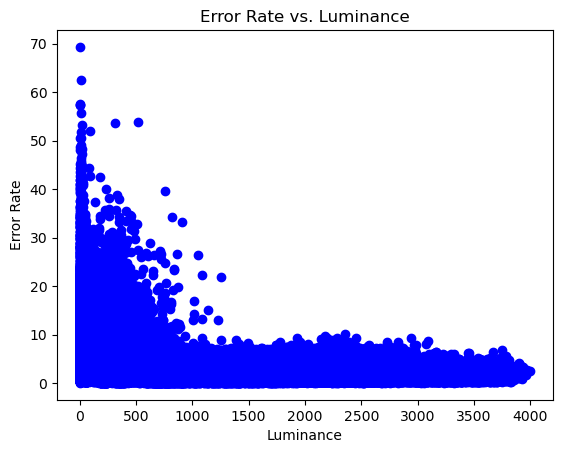

In [14]:
Auswertung_Encoding_PQ_UHD_vs_Luminance("/Volumes/jm_HDD/jm_MA_V1/CONTENT/01_TIFF_ORIGINALS/02.1_ARRI_Encounters_PQ_HD_FR/V1-0012_Compound Clip 43.000000.tif","pq_full","/Volumes/jm_HDD/jm_MA_V1/CONTENT/41_TIFF_EXTRACTION_NEW/02.1_ARRI_Encounters_PQ_HD_FR/09_H265_Main422_10/Compound Clip 43_V1-0012.000200.tif","pq_full")

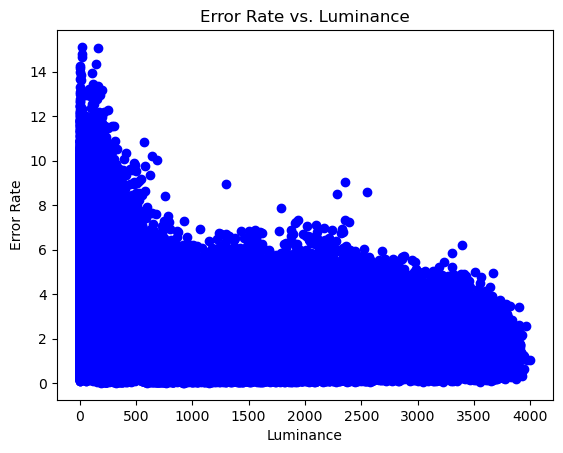

In [16]:
Auswertung_Encoding_PQ_UHD_vs_Luminance("/Volumes/jm_HDD/jm_MA_V1/CONTENT/01_TIFF_ORIGINALS/02.1_ARRI_Encounters_PQ_HD_FR/V1-0012_Compound Clip 43.000000.tif","pq_full","/Volumes/jm_HDD/jm_MA_V1/CONTENT/41_TIFF_EXTRACTION_NEW/02.1_ARRI_Encounters_PQ_HD_FR/03a_JPEG_2000_Profile_Level_1/Compound Clip 43_V1-0012.000200.tif","pq_full")